# Continuous Control

---

Congratulations for completing the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control an agent in a more challenging environment, where the goal is to train a creature with four arms to walk forward.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [16]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Crawler.app"`
- **Windows** (x86): `"path/to/Crawler_Windows_x86/Crawler.exe"`
- **Windows** (x86_64): `"path/to/Crawler_Windows_x86_64/Crawler.exe"`
- **Linux** (x86): `"path/to/Crawler_Linux/Crawler.x86"`
- **Linux** (x86_64): `"path/to/Crawler_Linux/Crawler.x86_64"`
- **Linux** (x86, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86"`
- **Linux** (x86_64, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86_64"`

For instance, if you are using a Mac, then you downloaded `Crawler.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Crawler.app")
```

In [17]:
env = UnityEnvironment(file_name='./Crawler_Windows_x86_64/Crawler.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [18]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [19]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129
The state for the first agent looks like: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.25000000e+00
  1.00000000e+00  0.00000000e+00  1.78813934e-07  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.06093168e-01 -1.42857209e-01 -6.06078804e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.33339906e+00 -1.42857209e-01
 -1.33341408e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.0609

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [20]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.3351703603596737


When finished, you can close the environment.

In [21]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [24]:
import torch
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

def ddpg(n_episodes=10000, max_t=100):
    avg_score = []
    solved = False
    env_info = env.reset(train_mode=True)[brain_name]

    states = env_info.vector_observations

    agent_kwargs = {"state_size": state_size, "action_size": action_size, "random_seed": 2,}
    agents = [Agent(**agent_kwargs) for _ in range(num_agents)]

    assert len(agents) == num_agents
    actions = [agent.act(states[index]) for index, agent in enumerate(agents)]
    
    chkpt_episodes = 1000
    scores_deque = deque(maxlen=100)
    scores = np.zeros(num_agents)

    time_steps = 32
    num_update = 16
    len_agents = len(str(num_agents))
    
    for i_episode in range(1, n_episodes+1):
        states = env_info.vector_observations                  # get the current state (for each agent)
        for agent in agents:
            agent.reset()

        for t in range(max_t):
            actions = [agent.act(states[index]) for index, agent in enumerate(agents)]
            
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            step_tuple = zip(agents, states, actions, rewards, next_states, dones)
            
            for agent, s, a, r, s_, d in step_tuple:
                agent.memory.add(s, a, r, s_, d)
                if ( t % time_steps == 0):
                    agent.step(num_update)
            states  = next_states
            scores += rewards                                  # update the score (for each agent)
            if np.any(dones):                                  # exit loop if episode finished
                break
                
        score = np.mean(scores)        
        avg_score.append(score)
        scores_deque.append(score)

        avg = np.mean(scores_deque)
            
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f} \tMax Score: {:.2f}'.format(i_episode, avg, score, np.max(scores_deque)), end="\n")

        if not solved and np.mean(scores_deque) > 30.:
            print("\r\renv __solved__ @ i_episode={i_episode}, w/ avg_score={avg:.2f}\r".format(i_episode=i_episode, avg=avg))
            solved = True
        
        
        if i_episode % chkpt_episodes == 0:
            print("\repisodes: {i_episode}\tavg: {avg:.2f}".format(i_episode=i_episode, avg=avg))

            for idx, agent in enumerate(agents):
                chkpt_path_actor = "actor_c_" + str(idx).zfill(len_agents) + ".pth"
                torch.save(agent.actor_local.state_dict(), chkpt_path_actor)

                chkpt_path_critic = "critic_c_" + str(idx).zfill(len_agents) + ".pth"
                torch.save(agent.critic_local.state_dict(), chkpt_path_critic)

    return avg_score

In [25]:
#env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')
#brain_name = env.brain_names[0]
#brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
scores = ddpg()

Episode 1	Average Score: 1.08	Score: 1.08 	Max Score: 1.08
Episode 2	Average Score: 0.95	Score: 0.82 	Max Score: 1.08
Episode 3	Average Score: 0.87	Score: 0.71 	Max Score: 1.08
Episode 4	Average Score: 0.83	Score: 0.71 	Max Score: 1.08
Episode 5	Average Score: 0.79	Score: 0.63 	Max Score: 1.08
Episode 6	Average Score: 0.83	Score: 1.02 	Max Score: 1.08
Episode 7	Average Score: 1.02	Score: 2.18 	Max Score: 2.18
Episode 8	Average Score: 1.22	Score: 2.58 	Max Score: 2.58
Episode 9	Average Score: 1.36	Score: 2.45 	Max Score: 2.58
Episode 10	Average Score: 1.46	Score: 2.40 	Max Score: 2.58
Episode 11	Average Score: 1.54	Score: 2.34 	Max Score: 2.58
Episode 12	Average Score: 1.60	Score: 2.28 	Max Score: 2.58
Episode 13	Average Score: 1.65	Score: 2.18 	Max Score: 2.58
Episode 14	Average Score: 1.68	Score: 2.09 	Max Score: 2.58
Episode 15	Average Score: 1.69	Score: 1.80 	Max Score: 2.58
Episode 16	Average Score: 1.69	Score: 1.75 	Max Score: 2.58
Episode 17	Average Score: 1.69	Score: 1.70 	Max S

Episode 138	Average Score: 5.19	Score: 6.50 	Max Score: 6.75
Episode 139	Average Score: 5.23	Score: 6.41 	Max Score: 6.75
Episode 140	Average Score: 5.26	Score: 6.38 	Max Score: 6.75
Episode 141	Average Score: 5.30	Score: 6.38 	Max Score: 6.75
Episode 142	Average Score: 5.34	Score: 6.63 	Max Score: 6.75
Episode 143	Average Score: 5.38	Score: 6.63 	Max Score: 6.75
Episode 144	Average Score: 5.42	Score: 6.87 	Max Score: 6.87
Episode 145	Average Score: 5.46	Score: 6.80 	Max Score: 6.87
Episode 146	Average Score: 5.50	Score: 6.82 	Max Score: 6.87
Episode 147	Average Score: 5.54	Score: 6.70 	Max Score: 6.87
Episode 148	Average Score: 5.58	Score: 7.33 	Max Score: 7.33
Episode 149	Average Score: 5.62	Score: 7.47 	Max Score: 7.47
Episode 150	Average Score: 5.66	Score: 7.39 	Max Score: 7.47
Episode 151	Average Score: 5.70	Score: 7.36 	Max Score: 7.47
Episode 152	Average Score: 5.73	Score: 7.32 	Max Score: 7.47
Episode 153	Average Score: 5.76	Score: 7.31 	Max Score: 7.47
Episode 154	Average Scor

Episode 270	Average Score: 13.64	Score: 19.21 	Max Score: 19.39
Episode 271	Average Score: 13.75	Score: 19.20 	Max Score: 19.39
Episode 272	Average Score: 13.85	Score: 19.12 	Max Score: 19.39
Episode 273	Average Score: 13.95	Score: 19.19 	Max Score: 19.39
Episode 274	Average Score: 14.05	Score: 19.55 	Max Score: 19.55
Episode 275	Average Score: 14.16	Score: 19.75 	Max Score: 19.75
Episode 276	Average Score: 14.26	Score: 19.76 	Max Score: 19.76
Episode 277	Average Score: 14.37	Score: 19.78 	Max Score: 19.78
Episode 278	Average Score: 14.47	Score: 19.79 	Max Score: 19.79
Episode 279	Average Score: 14.58	Score: 20.00 	Max Score: 20.00
Episode 280	Average Score: 14.69	Score: 20.12 	Max Score: 20.12
Episode 281	Average Score: 14.80	Score: 20.75 	Max Score: 20.75
Episode 282	Average Score: 14.92	Score: 20.94 	Max Score: 20.94
Episode 283	Average Score: 15.03	Score: 20.88 	Max Score: 20.94
Episode 284	Average Score: 15.14	Score: 20.91 	Max Score: 20.94
Episode 285	Average Score: 15.26	Score: 

Episode 398	Average Score: 33.77	Score: 45.34 	Max Score: 45.34
Episode 399	Average Score: 33.99	Score: 45.43 	Max Score: 45.43
Episode 400	Average Score: 34.22	Score: 46.02 	Max Score: 46.02
Episode 401	Average Score: 34.44	Score: 46.00 	Max Score: 46.02
Episode 402	Average Score: 34.66	Score: 46.16 	Max Score: 46.16
Episode 403	Average Score: 34.88	Score: 46.76 	Max Score: 46.76
Episode 404	Average Score: 35.10	Score: 47.01 	Max Score: 47.01
Episode 405	Average Score: 35.32	Score: 47.63 	Max Score: 47.63
Episode 406	Average Score: 35.54	Score: 47.71 	Max Score: 47.71
Episode 407	Average Score: 35.76	Score: 48.03 	Max Score: 48.03
Episode 408	Average Score: 35.99	Score: 48.76 	Max Score: 48.76
Episode 409	Average Score: 36.22	Score: 48.88 	Max Score: 48.88
Episode 410	Average Score: 36.44	Score: 49.04 	Max Score: 49.04
Episode 411	Average Score: 36.67	Score: 49.42 	Max Score: 49.42
Episode 412	Average Score: 36.90	Score: 49.50 	Max Score: 49.50
Episode 413	Average Score: 37.13	Score: 

Episode 527	Average Score: 67.35	Score: 84.69 	Max Score: 84.69
Episode 528	Average Score: 67.66	Score: 85.38 	Max Score: 85.38
Episode 529	Average Score: 67.98	Score: 85.78 	Max Score: 85.78
Episode 530	Average Score: 68.30	Score: 86.64 	Max Score: 86.64
Episode 531	Average Score: 68.62	Score: 86.76 	Max Score: 86.76
Episode 532	Average Score: 68.95	Score: 86.75 	Max Score: 86.76
Episode 533	Average Score: 69.29	Score: 88.38 	Max Score: 88.38
Episode 534	Average Score: 69.63	Score: 88.81 	Max Score: 88.81
Episode 535	Average Score: 69.98	Score: 89.18 	Max Score: 89.18
Episode 536	Average Score: 70.32	Score: 89.30 	Max Score: 89.30
Episode 537	Average Score: 70.66	Score: 89.37 	Max Score: 89.37
Episode 538	Average Score: 71.00	Score: 89.56 	Max Score: 89.56
Episode 539	Average Score: 71.35	Score: 90.30 	Max Score: 90.30
Episode 540	Average Score: 71.69	Score: 90.47 	Max Score: 90.47
Episode 541	Average Score: 72.04	Score: 90.78 	Max Score: 90.78
Episode 542	Average Score: 72.39	Score: 

Episode 652	Average Score: 114.42	Score: 139.11 	Max Score: 139.11
Episode 653	Average Score: 114.85	Score: 139.13 	Max Score: 139.13
Episode 654	Average Score: 115.28	Score: 139.73 	Max Score: 139.73
Episode 655	Average Score: 115.71	Score: 140.50 	Max Score: 140.50
Episode 656	Average Score: 116.14	Score: 140.56 	Max Score: 140.56
Episode 657	Average Score: 116.56	Score: 140.73 	Max Score: 140.73
Episode 658	Average Score: 116.99	Score: 141.40 	Max Score: 141.40
Episode 659	Average Score: 117.43	Score: 141.93 	Max Score: 141.93
Episode 660	Average Score: 117.86	Score: 141.87 	Max Score: 141.93
Episode 661	Average Score: 118.29	Score: 142.32 	Max Score: 142.32
Episode 662	Average Score: 118.73	Score: 143.30 	Max Score: 143.30
Episode 663	Average Score: 119.16	Score: 143.38 	Max Score: 143.38
Episode 664	Average Score: 119.60	Score: 143.49 	Max Score: 143.49
Episode 665	Average Score: 120.03	Score: 144.44 	Max Score: 144.44
Episode 666	Average Score: 120.46	Score: 144.80 	Max Score: 14

Episode 775	Average Score: 175.73	Score: 202.85 	Max Score: 202.85
Episode 776	Average Score: 176.25	Score: 203.08 	Max Score: 203.08
Episode 777	Average Score: 176.77	Score: 203.13 	Max Score: 203.13
Episode 778	Average Score: 177.29	Score: 203.37 	Max Score: 203.37
Episode 779	Average Score: 177.80	Score: 203.93 	Max Score: 203.93
Episode 780	Average Score: 178.29	Score: 203.98 	Max Score: 203.98
Episode 781	Average Score: 178.80	Score: 205.01 	Max Score: 205.01
Episode 782	Average Score: 179.32	Score: 206.97 	Max Score: 206.97
Episode 783	Average Score: 179.85	Score: 208.08 	Max Score: 208.08
Episode 784	Average Score: 180.37	Score: 208.08 	Max Score: 208.08
Episode 785	Average Score: 180.89	Score: 208.20 	Max Score: 208.20
Episode 786	Average Score: 181.41	Score: 208.47 	Max Score: 208.47
Episode 787	Average Score: 181.94	Score: 209.20 	Max Score: 209.20
Episode 788	Average Score: 182.46	Score: 209.32 	Max Score: 209.32
Episode 789	Average Score: 182.99	Score: 211.39 	Max Score: 21

Episode 898	Average Score: 257.57	Score: 298.88 	Max Score: 298.88
Episode 899	Average Score: 258.40	Score: 299.76 	Max Score: 299.76
Episode 900	Average Score: 259.22	Score: 300.63 	Max Score: 300.63
Episode 901	Average Score: 260.06	Score: 303.53 	Max Score: 303.53
Episode 902	Average Score: 260.92	Score: 305.28 	Max Score: 305.28
Episode 903	Average Score: 261.77	Score: 305.75 	Max Score: 305.75
Episode 904	Average Score: 262.62	Score: 305.88 	Max Score: 305.88
Episode 905	Average Score: 263.48	Score: 306.82 	Max Score: 306.82
Episode 906	Average Score: 264.33	Score: 307.03 	Max Score: 307.03
Episode 907	Average Score: 265.18	Score: 307.23 	Max Score: 307.23
Episode 908	Average Score: 266.00	Score: 307.92 	Max Score: 307.92
Episode 909	Average Score: 266.84	Score: 309.76 	Max Score: 309.76
Episode 910	Average Score: 267.67	Score: 310.35 	Max Score: 310.35
Episode 911	Average Score: 268.52	Score: 312.23 	Max Score: 312.23
Episode 912	Average Score: 269.38	Score: 313.77 	Max Score: 31

Episode 1020	Average Score: 355.91	Score: 387.12 	Max Score: 387.12
Episode 1021	Average Score: 356.60	Score: 388.91 	Max Score: 388.91
Episode 1022	Average Score: 357.30	Score: 389.40 	Max Score: 389.40
Episode 1023	Average Score: 358.01	Score: 391.01 	Max Score: 391.01
Episode 1024	Average Score: 358.71	Score: 391.22 	Max Score: 391.22
Episode 1025	Average Score: 359.42	Score: 391.34 	Max Score: 391.34
Episode 1026	Average Score: 360.13	Score: 391.41 	Max Score: 391.41
Episode 1027	Average Score: 360.83	Score: 392.04 	Max Score: 392.04
Episode 1028	Average Score: 361.53	Score: 392.87 	Max Score: 392.87
Episode 1029	Average Score: 362.23	Score: 393.03 	Max Score: 393.03
Episode 1030	Average Score: 362.90	Score: 393.51 	Max Score: 393.51
Episode 1031	Average Score: 363.57	Score: 393.72 	Max Score: 393.72
Episode 1032	Average Score: 364.24	Score: 394.71 	Max Score: 394.71
Episode 1033	Average Score: 364.91	Score: 394.93 	Max Score: 394.93
Episode 1034	Average Score: 365.58	Score: 395.39

Episode 1141	Average Score: 440.06	Score: 478.94 	Max Score: 478.94
Episode 1142	Average Score: 440.81	Score: 479.15 	Max Score: 479.15
Episode 1143	Average Score: 441.57	Score: 479.70 	Max Score: 479.70
Episode 1144	Average Score: 442.32	Score: 480.86 	Max Score: 480.86
Episode 1145	Average Score: 443.08	Score: 482.95 	Max Score: 482.95
Episode 1146	Average Score: 443.84	Score: 483.45 	Max Score: 483.45
Episode 1147	Average Score: 444.61	Score: 484.59 	Max Score: 484.59
Episode 1148	Average Score: 445.38	Score: 484.76 	Max Score: 484.76
Episode 1149	Average Score: 446.14	Score: 485.14 	Max Score: 485.14
Episode 1150	Average Score: 446.91	Score: 485.28 	Max Score: 485.28
Episode 1151	Average Score: 447.67	Score: 486.23 	Max Score: 486.23
Episode 1152	Average Score: 448.44	Score: 488.72 	Max Score: 488.72
Episode 1153	Average Score: 449.22	Score: 489.47 	Max Score: 489.47
Episode 1154	Average Score: 450.00	Score: 490.11 	Max Score: 490.11
Episode 1155	Average Score: 450.76	Score: 490.37

Episode 1262	Average Score: 532.94	Score: 570.22 	Max Score: 570.22
Episode 1263	Average Score: 533.68	Score: 570.88 	Max Score: 570.88
Episode 1264	Average Score: 534.44	Score: 573.20 	Max Score: 573.20
Episode 1265	Average Score: 535.20	Score: 573.38 	Max Score: 573.38
Episode 1266	Average Score: 535.94	Score: 573.51 	Max Score: 573.51
Episode 1267	Average Score: 536.69	Score: 573.71 	Max Score: 573.71
Episode 1268	Average Score: 537.43	Score: 573.71 	Max Score: 573.71
Episode 1269	Average Score: 538.18	Score: 575.29 	Max Score: 575.29
Episode 1270	Average Score: 538.93	Score: 575.57 	Max Score: 575.57
Episode 1271	Average Score: 539.67	Score: 575.96 	Max Score: 575.96
Episode 1272	Average Score: 540.42	Score: 576.49 	Max Score: 576.49
Episode 1273	Average Score: 541.15	Score: 576.67 	Max Score: 576.67
Episode 1274	Average Score: 541.88	Score: 577.70 	Max Score: 577.70
Episode 1275	Average Score: 542.61	Score: 578.46 	Max Score: 578.46
Episode 1276	Average Score: 543.34	Score: 578.61

Episode 1383	Average Score: 629.29	Score: 670.64 	Max Score: 670.64
Episode 1384	Average Score: 630.14	Score: 670.77 	Max Score: 670.77
Episode 1385	Average Score: 631.00	Score: 671.54 	Max Score: 671.54
Episode 1386	Average Score: 631.85	Score: 671.58 	Max Score: 671.58
Episode 1387	Average Score: 632.69	Score: 671.87 	Max Score: 671.87
Episode 1388	Average Score: 633.53	Score: 672.12 	Max Score: 672.12
Episode 1389	Average Score: 634.36	Score: 672.46 	Max Score: 672.46
Episode 1390	Average Score: 635.18	Score: 672.60 	Max Score: 672.60
Episode 1391	Average Score: 636.03	Score: 676.19 	Max Score: 676.19
Episode 1392	Average Score: 636.89	Score: 676.59 	Max Score: 676.59
Episode 1393	Average Score: 637.74	Score: 677.18 	Max Score: 677.18
Episode 1394	Average Score: 638.59	Score: 677.97 	Max Score: 677.97
Episode 1395	Average Score: 639.43	Score: 678.04 	Max Score: 678.04
Episode 1396	Average Score: 640.27	Score: 678.20 	Max Score: 678.20
Episode 1397	Average Score: 641.08	Score: 678.34

Episode 1504	Average Score: 724.96	Score: 765.78 	Max Score: 765.78
Episode 1505	Average Score: 725.78	Score: 767.06 	Max Score: 767.06
Episode 1506	Average Score: 726.61	Score: 767.29 	Max Score: 767.29
Episode 1507	Average Score: 727.43	Score: 767.49 	Max Score: 767.49
Episode 1508	Average Score: 728.26	Score: 767.67 	Max Score: 767.67
Episode 1509	Average Score: 729.09	Score: 767.85 	Max Score: 767.85
Episode 1510	Average Score: 729.92	Score: 768.29 	Max Score: 768.29
Episode 1511	Average Score: 730.76	Score: 769.48 	Max Score: 769.48
Episode 1512	Average Score: 731.59	Score: 769.67 	Max Score: 769.67
Episode 1513	Average Score: 732.41	Score: 769.83 	Max Score: 769.83
Episode 1514	Average Score: 733.23	Score: 770.77 	Max Score: 770.77
Episode 1515	Average Score: 734.06	Score: 771.69 	Max Score: 771.69
Episode 1516	Average Score: 734.87	Score: 772.07 	Max Score: 772.07
Episode 1517	Average Score: 735.69	Score: 773.52 	Max Score: 773.52
Episode 1518	Average Score: 736.51	Score: 775.00

Episode 1625	Average Score: 830.80	Score: 882.24 	Max Score: 882.24
Episode 1626	Average Score: 831.84	Score: 885.32 	Max Score: 885.32
Episode 1627	Average Score: 832.88	Score: 885.47 	Max Score: 885.47
Episode 1628	Average Score: 833.91	Score: 885.67 	Max Score: 885.67
Episode 1629	Average Score: 834.94	Score: 886.63 	Max Score: 886.63
Episode 1630	Average Score: 835.94	Score: 887.13 	Max Score: 887.13
Episode 1631	Average Score: 836.95	Score: 887.62 	Max Score: 887.62
Episode 1632	Average Score: 837.95	Score: 888.30 	Max Score: 888.30
Episode 1633	Average Score: 838.98	Score: 892.73 	Max Score: 892.73
Episode 1634	Average Score: 840.01	Score: 893.23 	Max Score: 893.23
Episode 1635	Average Score: 841.05	Score: 893.39 	Max Score: 893.39
Episode 1636	Average Score: 842.08	Score: 893.72 	Max Score: 893.72
Episode 1637	Average Score: 843.12	Score: 893.82 	Max Score: 893.82
Episode 1638	Average Score: 844.16	Score: 894.98 	Max Score: 894.98
Episode 1639	Average Score: 845.20	Score: 895.33

Episode 1746	Average Score: 950.28	Score: 998.62 	Max Score: 998.62
Episode 1747	Average Score: 951.23	Score: 998.82 	Max Score: 998.82
Episode 1748	Average Score: 952.18	Score: 999.19 	Max Score: 999.19
Episode 1749	Average Score: 953.13	Score: 1000.45 	Max Score: 1000.45
Episode 1750	Average Score: 954.13	Score: 1005.21 	Max Score: 1005.21
Episode 1751	Average Score: 955.13	Score: 1005.55 	Max Score: 1005.55
Episode 1752	Average Score: 956.08	Score: 1006.20 	Max Score: 1006.20
Episode 1753	Average Score: 957.03	Score: 1006.49 	Max Score: 1006.49
Episode 1754	Average Score: 957.97	Score: 1007.11 	Max Score: 1007.11
Episode 1755	Average Score: 958.92	Score: 1008.17 	Max Score: 1008.17
Episode 1756	Average Score: 959.86	Score: 1008.33 	Max Score: 1008.33
Episode 1757	Average Score: 960.81	Score: 1008.58 	Max Score: 1008.58
Episode 1758	Average Score: 961.76	Score: 1011.79 	Max Score: 1011.79
Episode 1759	Average Score: 962.73	Score: 1012.65 	Max Score: 1012.65
Episode 1760	Average Score

Episode 1863	Average Score: 1056.42	Score: 1104.27 	Max Score: 1104.27
Episode 1864	Average Score: 1057.32	Score: 1105.34 	Max Score: 1105.34
Episode 1865	Average Score: 1058.24	Score: 1108.59 	Max Score: 1108.59
Episode 1866	Average Score: 1059.17	Score: 1109.39 	Max Score: 1109.39
Episode 1867	Average Score: 1060.10	Score: 1109.84 	Max Score: 1109.84
Episode 1868	Average Score: 1061.01	Score: 1109.98 	Max Score: 1109.98
Episode 1869	Average Score: 1061.93	Score: 1111.39 	Max Score: 1111.39
Episode 1870	Average Score: 1062.85	Score: 1111.62 	Max Score: 1111.62
Episode 1871	Average Score: 1063.77	Score: 1111.78 	Max Score: 1111.78
Episode 1872	Average Score: 1064.69	Score: 1112.24 	Max Score: 1112.24
Episode 1873	Average Score: 1065.61	Score: 1112.61 	Max Score: 1112.61
Episode 1874	Average Score: 1066.53	Score: 1113.06 	Max Score: 1113.06
Episode 1875	Average Score: 1067.46	Score: 1114.43 	Max Score: 1114.43
Episode 1876	Average Score: 1068.43	Score: 1118.65 	Max Score: 1118.65
Episod

Episode 1979	Average Score: 1169.78	Score: 1218.74 	Max Score: 1218.74
Episode 1980	Average Score: 1170.76	Score: 1219.22 	Max Score: 1219.22
Episode 1981	Average Score: 1171.73	Score: 1219.69 	Max Score: 1219.69
Episode 1982	Average Score: 1172.70	Score: 1220.14 	Max Score: 1220.14
Episode 1983	Average Score: 1173.67	Score: 1220.59 	Max Score: 1220.59
Episode 1984	Average Score: 1174.64	Score: 1220.68 	Max Score: 1220.68
Episode 1985	Average Score: 1175.61	Score: 1220.75 	Max Score: 1220.75
Episode 1986	Average Score: 1176.54	Score: 1220.89 	Max Score: 1220.89
Episode 1987	Average Score: 1177.48	Score: 1222.48 	Max Score: 1222.48
Episode 1988	Average Score: 1178.44	Score: 1224.46 	Max Score: 1224.46
Episode 1989	Average Score: 1179.40	Score: 1225.05 	Max Score: 1225.05
Episode 1990	Average Score: 1180.37	Score: 1226.73 	Max Score: 1226.73
Episode 1991	Average Score: 1181.33	Score: 1226.88 	Max Score: 1226.88
Episode 1992	Average Score: 1182.29	Score: 1227.09 	Max Score: 1227.09
Episod

Episode 2094	Average Score: 1273.70	Score: 1320.18 	Max Score: 1320.18
Episode 2095	Average Score: 1274.61	Score: 1320.39 	Max Score: 1320.39
Episode 2096	Average Score: 1275.52	Score: 1320.76 	Max Score: 1320.76
Episode 2097	Average Score: 1276.42	Score: 1320.80 	Max Score: 1320.80
Episode 2098	Average Score: 1277.32	Score: 1322.78 	Max Score: 1322.78
Episode 2099	Average Score: 1278.22	Score: 1323.63 	Max Score: 1323.63
Episode 2100	Average Score: 1279.13	Score: 1324.57 	Max Score: 1324.57
Episode 2101	Average Score: 1280.04	Score: 1324.99 	Max Score: 1324.99
Episode 2102	Average Score: 1280.96	Score: 1325.98 	Max Score: 1325.98
Episode 2103	Average Score: 1281.87	Score: 1326.39 	Max Score: 1326.39
Episode 2104	Average Score: 1282.77	Score: 1326.49 	Max Score: 1326.49
Episode 2105	Average Score: 1283.69	Score: 1328.35 	Max Score: 1328.35
Episode 2106	Average Score: 1284.60	Score: 1328.49 	Max Score: 1328.49
Episode 2107	Average Score: 1285.52	Score: 1331.03 	Max Score: 1331.03
Episod

Episode 2210	Average Score: 1377.52	Score: 1425.28 	Max Score: 1425.28
Episode 2211	Average Score: 1378.46	Score: 1426.83 	Max Score: 1426.83
Episode 2212	Average Score: 1379.41	Score: 1427.71 	Max Score: 1427.71
Episode 2213	Average Score: 1380.36	Score: 1429.02 	Max Score: 1429.02
Episode 2214	Average Score: 1381.32	Score: 1431.44 	Max Score: 1431.44
Episode 2215	Average Score: 1382.28	Score: 1431.98 	Max Score: 1431.98
Episode 2216	Average Score: 1383.24	Score: 1432.36 	Max Score: 1432.36
Episode 2217	Average Score: 1384.19	Score: 1432.41 	Max Score: 1432.41
Episode 2218	Average Score: 1385.15	Score: 1432.78 	Max Score: 1432.78
Episode 2219	Average Score: 1386.11	Score: 1434.31 	Max Score: 1434.31
Episode 2220	Average Score: 1387.07	Score: 1434.99 	Max Score: 1434.99
Episode 2221	Average Score: 1388.04	Score: 1435.50 	Max Score: 1435.50
Episode 2222	Average Score: 1389.02	Score: 1437.66 	Max Score: 1437.66
Episode 2223	Average Score: 1390.02	Score: 1440.87 	Max Score: 1440.87
Episod

Episode 2326	Average Score: 1491.48	Score: 1536.84 	Max Score: 1536.84
Episode 2327	Average Score: 1492.41	Score: 1537.29 	Max Score: 1537.29
Episode 2328	Average Score: 1493.36	Score: 1537.81 	Max Score: 1537.81
Episode 2329	Average Score: 1494.32	Score: 1540.62 	Max Score: 1540.62
Episode 2330	Average Score: 1495.28	Score: 1540.97 	Max Score: 1540.97
Episode 2331	Average Score: 1496.22	Score: 1542.04 	Max Score: 1542.04
Episode 2332	Average Score: 1497.17	Score: 1544.63 	Max Score: 1544.63
Episode 2333	Average Score: 1498.12	Score: 1547.20 	Max Score: 1547.20
Episode 2334	Average Score: 1499.07	Score: 1547.45 	Max Score: 1547.45
Episode 2335	Average Score: 1500.02	Score: 1547.66 	Max Score: 1547.66
Episode 2336	Average Score: 1500.97	Score: 1548.47 	Max Score: 1548.47
Episode 2337	Average Score: 1501.92	Score: 1548.66 	Max Score: 1548.66
Episode 2338	Average Score: 1502.88	Score: 1550.46 	Max Score: 1550.46
Episode 2339	Average Score: 1503.85	Score: 1552.16 	Max Score: 1552.16
Episod

Episode 2442	Average Score: 1613.26	Score: 1656.81 	Max Score: 1656.81
Episode 2443	Average Score: 1614.25	Score: 1656.91 	Max Score: 1656.91
Episode 2444	Average Score: 1615.20	Score: 1657.21 	Max Score: 1657.21
Episode 2445	Average Score: 1616.15	Score: 1658.29 	Max Score: 1658.29
Episode 2446	Average Score: 1617.11	Score: 1659.53 	Max Score: 1659.53
Episode 2447	Average Score: 1618.06	Score: 1659.67 	Max Score: 1659.67
Episode 2448	Average Score: 1619.01	Score: 1660.06 	Max Score: 1660.06
Episode 2449	Average Score: 1619.94	Score: 1661.23 	Max Score: 1661.23
Episode 2450	Average Score: 1620.88	Score: 1662.65 	Max Score: 1662.65
Episode 2451	Average Score: 1621.82	Score: 1664.18 	Max Score: 1664.18
Episode 2452	Average Score: 1622.78	Score: 1665.11 	Max Score: 1665.11
Episode 2453	Average Score: 1623.74	Score: 1667.58 	Max Score: 1667.58
Episode 2454	Average Score: 1624.69	Score: 1668.60 	Max Score: 1668.60
Episode 2455	Average Score: 1625.64	Score: 1669.12 	Max Score: 1669.12
Episod

Episode 2558	Average Score: 1717.56	Score: 1767.04 	Max Score: 1767.04
Episode 2559	Average Score: 1718.53	Score: 1768.39 	Max Score: 1768.39
Episode 2560	Average Score: 1719.49	Score: 1768.97 	Max Score: 1768.97
Episode 2561	Average Score: 1720.46	Score: 1769.90 	Max Score: 1769.90
Episode 2562	Average Score: 1721.43	Score: 1771.02 	Max Score: 1771.02
Episode 2563	Average Score: 1722.41	Score: 1771.31 	Max Score: 1771.31
Episode 2564	Average Score: 1723.38	Score: 1771.35 	Max Score: 1771.35
Episode 2565	Average Score: 1724.33	Score: 1771.58 	Max Score: 1771.58
Episode 2566	Average Score: 1725.27	Score: 1771.73 	Max Score: 1771.73
Episode 2567	Average Score: 1726.22	Score: 1772.00 	Max Score: 1772.00
Episode 2568	Average Score: 1727.17	Score: 1772.00 	Max Score: 1772.00
Episode 2569	Average Score: 1728.14	Score: 1775.03 	Max Score: 1775.03
Episode 2570	Average Score: 1729.14	Score: 1777.79 	Max Score: 1777.79
Episode 2571	Average Score: 1730.11	Score: 1778.67 	Max Score: 1778.67
Episod

Episode 2674	Average Score: 1823.15	Score: 1862.04 	Max Score: 1862.04
Episode 2675	Average Score: 1823.94	Score: 1862.76 	Max Score: 1862.76
Episode 2676	Average Score: 1824.72	Score: 1864.70 	Max Score: 1864.70
Episode 2677	Average Score: 1825.53	Score: 1867.63 	Max Score: 1867.63
Episode 2678	Average Score: 1826.35	Score: 1868.52 	Max Score: 1868.52
Episode 2679	Average Score: 1827.16	Score: 1868.59 	Max Score: 1868.59
Episode 2680	Average Score: 1827.97	Score: 1868.98 	Max Score: 1868.98
Episode 2681	Average Score: 1828.80	Score: 1871.64 	Max Score: 1871.64
Episode 2682	Average Score: 1829.64	Score: 1873.04 	Max Score: 1873.04
Episode 2683	Average Score: 1830.48	Score: 1873.58 	Max Score: 1873.58
Episode 2684	Average Score: 1831.32	Score: 1873.79 	Max Score: 1873.79
Episode 2685	Average Score: 1832.15	Score: 1875.01 	Max Score: 1875.01
Episode 2686	Average Score: 1832.98	Score: 1876.08 	Max Score: 1876.08
Episode 2687	Average Score: 1833.81	Score: 1876.46 	Max Score: 1876.46
Episod

Episode 2790	Average Score: 1915.47	Score: 1964.14 	Max Score: 1964.14
Episode 2791	Average Score: 1916.33	Score: 1965.37 	Max Score: 1965.37
Episode 2792	Average Score: 1917.19	Score: 1965.72 	Max Score: 1965.72
Episode 2793	Average Score: 1918.07	Score: 1967.62 	Max Score: 1967.62
Episode 2794	Average Score: 1918.95	Score: 1967.83 	Max Score: 1967.83
Episode 2795	Average Score: 1919.82	Score: 1968.24 	Max Score: 1968.24
Episode 2796	Average Score: 1920.69	Score: 1968.67 	Max Score: 1968.67
Episode 2797	Average Score: 1921.58	Score: 1970.15 	Max Score: 1970.15
Episode 2798	Average Score: 1922.47	Score: 1970.95 	Max Score: 1970.95
Episode 2799	Average Score: 1923.38	Score: 1972.72 	Max Score: 1972.72
Episode 2800	Average Score: 1924.29	Score: 1973.38 	Max Score: 1973.38
Episode 2801	Average Score: 1925.20	Score: 1973.63 	Max Score: 1973.63
Episode 2802	Average Score: 1926.13	Score: 1976.02 	Max Score: 1976.02
Episode 2803	Average Score: 1927.06	Score: 1976.73 	Max Score: 1976.73
Episod

Episode 2906	Average Score: 2029.24	Score: 2077.19 	Max Score: 2077.19
Episode 2907	Average Score: 2030.24	Score: 2078.55 	Max Score: 2078.55
Episode 2908	Average Score: 2031.24	Score: 2078.84 	Max Score: 2078.84
Episode 2909	Average Score: 2032.23	Score: 2080.66 	Max Score: 2080.66
Episode 2910	Average Score: 2033.19	Score: 2080.76 	Max Score: 2080.76
Episode 2911	Average Score: 2034.16	Score: 2081.32 	Max Score: 2081.32
Episode 2912	Average Score: 2035.13	Score: 2081.68 	Max Score: 2081.68
Episode 2913	Average Score: 2036.09	Score: 2081.93 	Max Score: 2081.93
Episode 2914	Average Score: 2037.07	Score: 2083.94 	Max Score: 2083.94
Episode 2915	Average Score: 2038.06	Score: 2085.33 	Max Score: 2085.33
Episode 2916	Average Score: 2039.04	Score: 2085.77 	Max Score: 2085.77
Episode 2917	Average Score: 2040.01	Score: 2086.30 	Max Score: 2086.30
Episode 2918	Average Score: 2040.98	Score: 2086.40 	Max Score: 2086.40
Episode 2919	Average Score: 2041.93	Score: 2086.51 	Max Score: 2086.51
Episod

Episode 3021	Average Score: 2133.21	Score: 2187.80 	Max Score: 2187.80
Episode 3022	Average Score: 2134.23	Score: 2189.31 	Max Score: 2189.31
Episode 3023	Average Score: 2135.23	Score: 2189.77 	Max Score: 2189.77
Episode 3024	Average Score: 2136.23	Score: 2190.53 	Max Score: 2190.53
Episode 3025	Average Score: 2137.22	Score: 2191.29 	Max Score: 2191.29
Episode 3026	Average Score: 2138.22	Score: 2191.75 	Max Score: 2191.75
Episode 3027	Average Score: 2139.19	Score: 2192.18 	Max Score: 2192.18
Episode 3028	Average Score: 2140.17	Score: 2194.03 	Max Score: 2194.03
Episode 3029	Average Score: 2141.19	Score: 2198.68 	Max Score: 2198.68
Episode 3030	Average Score: 2142.19	Score: 2198.90 	Max Score: 2198.90
Episode 3031	Average Score: 2143.19	Score: 2199.40 	Max Score: 2199.40
Episode 3032	Average Score: 2144.19	Score: 2199.73 	Max Score: 2199.73
Episode 3033	Average Score: 2145.19	Score: 2200.16 	Max Score: 2200.16
Episode 3034	Average Score: 2146.19	Score: 2200.35 	Max Score: 2200.35
Episod

Episode 3137	Average Score: 2247.11	Score: 2295.12 	Max Score: 2295.12
Episode 3138	Average Score: 2248.03	Score: 2295.64 	Max Score: 2295.64
Episode 3139	Average Score: 2248.94	Score: 2295.74 	Max Score: 2295.74
Episode 3140	Average Score: 2249.87	Score: 2297.44 	Max Score: 2297.44
Episode 3141	Average Score: 2250.79	Score: 2297.81 	Max Score: 2297.81
Episode 3142	Average Score: 2251.71	Score: 2298.40 	Max Score: 2298.40
Episode 3143	Average Score: 2252.62	Score: 2298.55 	Max Score: 2298.55
Episode 3144	Average Score: 2253.54	Score: 2299.60 	Max Score: 2299.60
Episode 3145	Average Score: 2254.46	Score: 2300.04 	Max Score: 2300.04
Episode 3146	Average Score: 2255.37	Score: 2300.41 	Max Score: 2300.41
Episode 3147	Average Score: 2256.30	Score: 2302.40 	Max Score: 2302.40
Episode 3148	Average Score: 2257.29	Score: 2307.83 	Max Score: 2307.83
Episode 3149	Average Score: 2258.27	Score: 2308.11 	Max Score: 2308.11
Episode 3150	Average Score: 2259.26	Score: 2309.32 	Max Score: 2309.32
Episod

Episode 3253	Average Score: 2359.40	Score: 2398.88 	Max Score: 2398.88
Episode 3254	Average Score: 2360.26	Score: 2399.43 	Max Score: 2399.43
Episode 3255	Average Score: 2361.11	Score: 2399.44 	Max Score: 2399.44
Episode 3256	Average Score: 2361.95	Score: 2400.83 	Max Score: 2400.83
Episode 3257	Average Score: 2362.79	Score: 2401.54 	Max Score: 2401.54
Episode 3258	Average Score: 2363.63	Score: 2402.55 	Max Score: 2402.55
Episode 3259	Average Score: 2364.47	Score: 2404.55 	Max Score: 2404.55
Episode 3260	Average Score: 2365.32	Score: 2406.70 	Max Score: 2406.70
Episode 3261	Average Score: 2366.19	Score: 2407.84 	Max Score: 2407.84
Episode 3262	Average Score: 2367.03	Score: 2408.61 	Max Score: 2408.61
Episode 3263	Average Score: 2367.88	Score: 2409.07 	Max Score: 2409.07
Episode 3264	Average Score: 2368.70	Score: 2409.39 	Max Score: 2409.39
Episode 3265	Average Score: 2369.55	Score: 2412.49 	Max Score: 2412.49
Episode 3266	Average Score: 2370.38	Score: 2412.65 	Max Score: 2412.65
Episod

Episode 3369	Average Score: 2469.32	Score: 2526.96 	Max Score: 2526.98
Episode 3370	Average Score: 2470.44	Score: 2527.12 	Max Score: 2527.12
Episode 3371	Average Score: 2471.56	Score: 2528.60 	Max Score: 2528.60
Episode 3372	Average Score: 2472.64	Score: 2530.17 	Max Score: 2530.17
Episode 3373	Average Score: 2473.72	Score: 2532.11 	Max Score: 2532.11
Episode 3374	Average Score: 2474.84	Score: 2536.18 	Max Score: 2536.18
Episode 3375	Average Score: 2475.94	Score: 2536.47 	Max Score: 2536.47
Episode 3376	Average Score: 2477.04	Score: 2537.08 	Max Score: 2537.08
Episode 3377	Average Score: 2478.14	Score: 2538.65 	Max Score: 2538.65
Episode 3378	Average Score: 2479.22	Score: 2538.87 	Max Score: 2538.87
Episode 3379	Average Score: 2480.30	Score: 2540.40 	Max Score: 2540.40
Episode 3380	Average Score: 2481.38	Score: 2541.24 	Max Score: 2541.24
Episode 3381	Average Score: 2482.45	Score: 2541.32 	Max Score: 2541.32
Episode 3382	Average Score: 2483.53	Score: 2542.41 	Max Score: 2542.41
Episod

Episode 3485	Average Score: 2590.25	Score: 2638.31 	Max Score: 2638.31
Episode 3486	Average Score: 2591.17	Score: 2638.40 	Max Score: 2638.40
Episode 3487	Average Score: 2592.10	Score: 2638.64 	Max Score: 2638.64
Episode 3488	Average Score: 2592.98	Score: 2639.77 	Max Score: 2639.77
Episode 3489	Average Score: 2593.87	Score: 2639.89 	Max Score: 2639.89
Episode 3490	Average Score: 2594.77	Score: 2641.93 	Max Score: 2641.93
Episode 3491	Average Score: 2595.69	Score: 2644.49 	Max Score: 2644.49
Episode 3492	Average Score: 2596.61	Score: 2644.55 	Max Score: 2644.55
Episode 3493	Average Score: 2597.48	Score: 2644.57 	Max Score: 2644.57
Episode 3494	Average Score: 2598.36	Score: 2644.49 	Max Score: 2644.57
Episode 3495	Average Score: 2599.24	Score: 2645.98 	Max Score: 2645.98
Episode 3496	Average Score: 2600.11	Score: 2646.12 	Max Score: 2646.12
Episode 3497	Average Score: 2600.98	Score: 2646.21 	Max Score: 2646.21
Episode 3498	Average Score: 2601.85	Score: 2647.45 	Max Score: 2647.45
Episod

Episode 3601	Average Score: 2683.37	Score: 2720.83 	Max Score: 2720.83
Episode 3602	Average Score: 2684.09	Score: 2720.81 	Max Score: 2720.83
Episode 3603	Average Score: 2684.80	Score: 2721.21 	Max Score: 2721.21
Episode 3604	Average Score: 2685.52	Score: 2723.10 	Max Score: 2723.10
Episode 3605	Average Score: 2686.24	Score: 2723.31 	Max Score: 2723.31
Episode 3606	Average Score: 2686.96	Score: 2723.82 	Max Score: 2723.82
Episode 3607	Average Score: 2687.68	Score: 2724.37 	Max Score: 2724.37
Episode 3608	Average Score: 2688.40	Score: 2725.28 	Max Score: 2725.28
Episode 3609	Average Score: 2689.09	Score: 2725.75 	Max Score: 2725.75
Episode 3610	Average Score: 2689.78	Score: 2725.83 	Max Score: 2725.83
Episode 3611	Average Score: 2690.47	Score: 2726.31 	Max Score: 2726.31
Episode 3612	Average Score: 2691.16	Score: 2728.49 	Max Score: 2728.49
Episode 3613	Average Score: 2691.86	Score: 2729.99 	Max Score: 2729.99
Episode 3614	Average Score: 2692.57	Score: 2730.36 	Max Score: 2730.36
Episod

Episode 3717	Average Score: 2767.81	Score: 2806.18 	Max Score: 2806.18
Episode 3718	Average Score: 2768.52	Score: 2806.28 	Max Score: 2806.28
Episode 3719	Average Score: 2769.24	Score: 2806.61 	Max Score: 2806.61
Episode 3720	Average Score: 2769.95	Score: 2806.73 	Max Score: 2806.73
Episode 3721	Average Score: 2770.66	Score: 2806.98 	Max Score: 2806.98
Episode 3722	Average Score: 2771.38	Score: 2808.49 	Max Score: 2808.49
Episode 3723	Average Score: 2772.10	Score: 2808.97 	Max Score: 2808.97
Episode 3724	Average Score: 2772.83	Score: 2810.27 	Max Score: 2810.27
Episode 3725	Average Score: 2773.56	Score: 2810.71 	Max Score: 2810.71
Episode 3726	Average Score: 2774.30	Score: 2812.79 	Max Score: 2812.79
Episode 3727	Average Score: 2775.08	Score: 2815.73 	Max Score: 2815.73
Episode 3728	Average Score: 2775.83	Score: 2815.90 	Max Score: 2815.90
Episode 3729	Average Score: 2776.60	Score: 2817.59 	Max Score: 2817.59
Episode 3730	Average Score: 2777.35	Score: 2817.73 	Max Score: 2817.73
Episod

Episode 3833	Average Score: 2859.08	Score: 2898.02 	Max Score: 2898.02
Episode 3834	Average Score: 2859.87	Score: 2898.17 	Max Score: 2898.17
Episode 3835	Average Score: 2860.65	Score: 2898.36 	Max Score: 2898.36
Episode 3836	Average Score: 2861.43	Score: 2898.59 	Max Score: 2898.59
Episode 3837	Average Score: 2862.21	Score: 2899.07 	Max Score: 2899.07
Episode 3838	Average Score: 2863.00	Score: 2901.02 	Max Score: 2901.02
Episode 3839	Average Score: 2863.81	Score: 2903.16 	Max Score: 2903.16
Episode 3840	Average Score: 2864.62	Score: 2903.38 	Max Score: 2903.38
Episode 3841	Average Score: 2865.43	Score: 2903.58 	Max Score: 2903.58
Episode 3842	Average Score: 2866.23	Score: 2903.71 	Max Score: 2903.71
Episode 3843	Average Score: 2867.03	Score: 2904.80 	Max Score: 2904.80
Episode 3844	Average Score: 2867.83	Score: 2905.03 	Max Score: 2905.03
Episode 3845	Average Score: 2868.61	Score: 2905.49 	Max Score: 2905.49
Episode 3846	Average Score: 2869.38	Score: 2905.64 	Max Score: 2905.64
Episod

Episode 3949	Average Score: 2947.72	Score: 2990.95 	Max Score: 2990.95
Episode 3950	Average Score: 2948.54	Score: 2991.99 	Max Score: 2991.99
Episode 3951	Average Score: 2949.38	Score: 2993.35 	Max Score: 2993.35
Episode 3952	Average Score: 2950.21	Score: 2994.35 	Max Score: 2994.35
Episode 3953	Average Score: 2951.06	Score: 2995.69 	Max Score: 2995.69
Episode 3954	Average Score: 2951.91	Score: 2997.30 	Max Score: 2997.30
Episode 3955	Average Score: 2952.75	Score: 2997.65 	Max Score: 2997.65
Episode 3956	Average Score: 2953.60	Score: 2998.49 	Max Score: 2998.49
Episode 3957	Average Score: 2954.44	Score: 2998.65 	Max Score: 2998.65
Episode 3958	Average Score: 2955.28	Score: 2999.54 	Max Score: 2999.54
Episode 3959	Average Score: 2956.12	Score: 2999.68 	Max Score: 2999.68
Episode 3960	Average Score: 2956.95	Score: 3000.10 	Max Score: 3000.10
Episode 3961	Average Score: 2957.80	Score: 3002.30 	Max Score: 3002.30
Episode 3962	Average Score: 2958.65	Score: 3002.50 	Max Score: 3002.50
Episod

Episode 4064	Average Score: 3041.47	Score: 3071.74 	Max Score: 3071.74
Episode 4065	Average Score: 3042.12	Score: 3071.78 	Max Score: 3071.78
Episode 4066	Average Score: 3042.76	Score: 3071.93 	Max Score: 3071.93
Episode 4067	Average Score: 3043.39	Score: 3071.99 	Max Score: 3071.99
Episode 4068	Average Score: 3044.03	Score: 3072.96 	Max Score: 3072.96
Episode 4069	Average Score: 3044.67	Score: 3073.54 	Max Score: 3073.54
Episode 4070	Average Score: 3045.33	Score: 3075.03 	Max Score: 3075.03
Episode 4071	Average Score: 3046.01	Score: 3079.21 	Max Score: 3079.21
Episode 4072	Average Score: 3046.67	Score: 3079.41 	Max Score: 3079.41
Episode 4073	Average Score: 3047.33	Score: 3081.82 	Max Score: 3081.82
Episode 4074	Average Score: 3047.99	Score: 3082.41 	Max Score: 3082.41
Episode 4075	Average Score: 3048.65	Score: 3082.60 	Max Score: 3082.60
Episode 4076	Average Score: 3049.30	Score: 3082.74 	Max Score: 3082.74
Episode 4077	Average Score: 3049.97	Score: 3083.76 	Max Score: 3083.76
Episod

Episode 4180	Average Score: 3126.72	Score: 3167.07 	Max Score: 3167.07
Episode 4181	Average Score: 3127.53	Score: 3167.13 	Max Score: 3167.13
Episode 4182	Average Score: 3128.31	Score: 3167.57 	Max Score: 3167.57
Episode 4183	Average Score: 3129.09	Score: 3167.73 	Max Score: 3167.73
Episode 4184	Average Score: 3129.88	Score: 3168.87 	Max Score: 3168.87
Episode 4185	Average Score: 3130.64	Score: 3169.24 	Max Score: 3169.24
Episode 4186	Average Score: 3131.43	Score: 3171.62 	Max Score: 3171.62
Episode 4187	Average Score: 3132.22	Score: 3172.64 	Max Score: 3172.64
Episode 4188	Average Score: 3133.01	Score: 3173.14 	Max Score: 3173.14
Episode 4189	Average Score: 3133.81	Score: 3174.00 	Max Score: 3174.00
Episode 4190	Average Score: 3134.61	Score: 3174.97 	Max Score: 3174.97
Episode 4191	Average Score: 3135.42	Score: 3175.56 	Max Score: 3175.56
Episode 4192	Average Score: 3136.23	Score: 3176.09 	Max Score: 3176.09
Episode 4193	Average Score: 3137.05	Score: 3177.34 	Max Score: 3177.34
Episod

Episode 4296	Average Score: 3224.53	Score: 3276.69 	Max Score: 3276.69
Episode 4297	Average Score: 3225.47	Score: 3276.98 	Max Score: 3276.98
Episode 4298	Average Score: 3226.41	Score: 3277.88 	Max Score: 3277.88
Episode 4299	Average Score: 3227.35	Score: 3279.08 	Max Score: 3279.08
Episode 4300	Average Score: 3228.31	Score: 3280.86 	Max Score: 3280.86
Episode 4301	Average Score: 3229.29	Score: 3282.89 	Max Score: 3282.89
Episode 4302	Average Score: 3230.26	Score: 3283.22 	Max Score: 3283.22
Episode 4303	Average Score: 3231.24	Score: 3283.85 	Max Score: 3283.85
Episode 4304	Average Score: 3232.24	Score: 3287.18 	Max Score: 3287.18
Episode 4305	Average Score: 3233.27	Score: 3290.29 	Max Score: 3290.29
Episode 4306	Average Score: 3234.29	Score: 3291.39 	Max Score: 3291.39
Episode 4307	Average Score: 3235.32	Score: 3291.95 	Max Score: 3291.95
Episode 4308	Average Score: 3236.34	Score: 3292.15 	Max Score: 3292.15
Episode 4309	Average Score: 3237.37	Score: 3292.99 	Max Score: 3292.99
Episod

Episode 4412	Average Score: 3348.48	Score: 3391.43 	Max Score: 3391.43
Episode 4413	Average Score: 3349.45	Score: 3395.09 	Max Score: 3395.09
Episode 4414	Average Score: 3350.41	Score: 3396.01 	Max Score: 3396.01
Episode 4415	Average Score: 3351.38	Score: 3396.95 	Max Score: 3396.95
Episode 4416	Average Score: 3352.35	Score: 3399.09 	Max Score: 3399.09
Episode 4417	Average Score: 3353.32	Score: 3399.26 	Max Score: 3399.26
Episode 4418	Average Score: 3354.28	Score: 3399.49 	Max Score: 3399.49
Episode 4419	Average Score: 3355.21	Score: 3399.99 	Max Score: 3399.99
Episode 4420	Average Score: 3356.16	Score: 3401.78 	Max Score: 3401.78
Episode 4421	Average Score: 3357.13	Score: 3403.50 	Max Score: 3403.50
Episode 4422	Average Score: 3358.09	Score: 3403.80 	Max Score: 3403.80
Episode 4423	Average Score: 3359.05	Score: 3403.81 	Max Score: 3403.81
Episode 4424	Average Score: 3359.99	Score: 3404.86 	Max Score: 3404.86
Episode 4425	Average Score: 3360.92	Score: 3406.18 	Max Score: 3406.18
Episod

Episode 4528	Average Score: 3460.74	Score: 3513.06 	Max Score: 3513.06
Episode 4529	Average Score: 3461.83	Score: 3516.35 	Max Score: 3516.35
Episode 4530	Average Score: 3462.90	Score: 3517.04 	Max Score: 3517.04
Episode 4531	Average Score: 3463.95	Score: 3517.74 	Max Score: 3517.74
Episode 4532	Average Score: 3464.98	Score: 3518.07 	Max Score: 3518.07
Episode 4533	Average Score: 3466.03	Score: 3519.21 	Max Score: 3519.21
Episode 4534	Average Score: 3467.07	Score: 3520.30 	Max Score: 3520.30
Episode 4535	Average Score: 3468.12	Score: 3521.81 	Max Score: 3521.81
Episode 4536	Average Score: 3469.14	Score: 3521.97 	Max Score: 3521.97
Episode 4537	Average Score: 3470.16	Score: 3522.59 	Max Score: 3522.59
Episode 4538	Average Score: 3471.17	Score: 3522.61 	Max Score: 3522.61
Episode 4539	Average Score: 3472.18	Score: 3522.85 	Max Score: 3522.85
Episode 4540	Average Score: 3473.19	Score: 3523.11 	Max Score: 3523.11
Episode 4541	Average Score: 3474.20	Score: 3524.00 	Max Score: 3524.00
Episod

Episode 4644	Average Score: 3570.94	Score: 3618.13 	Max Score: 3618.13
Episode 4645	Average Score: 3571.86	Score: 3618.93 	Max Score: 3618.93
Episode 4646	Average Score: 3572.77	Score: 3619.10 	Max Score: 3619.10
Episode 4647	Average Score: 3573.71	Score: 3622.20 	Max Score: 3622.20
Episode 4648	Average Score: 3574.65	Score: 3622.47 	Max Score: 3622.47
Episode 4649	Average Score: 3575.56	Score: 3622.75 	Max Score: 3622.75
Episode 4650	Average Score: 3576.46	Score: 3623.31 	Max Score: 3623.31
Episode 4651	Average Score: 3577.37	Score: 3624.13 	Max Score: 3624.13
Episode 4652	Average Score: 3578.28	Score: 3626.06 	Max Score: 3626.06
Episode 4653	Average Score: 3579.24	Score: 3629.97 	Max Score: 3629.97
Episode 4654	Average Score: 3580.18	Score: 3630.23 	Max Score: 3630.23
Episode 4655	Average Score: 3581.15	Score: 3631.91 	Max Score: 3631.91
Episode 4656	Average Score: 3582.10	Score: 3632.09 	Max Score: 3632.09
Episode 4657	Average Score: 3583.06	Score: 3633.14 	Max Score: 3633.14
Episod

Episode 4760	Average Score: 3680.93	Score: 3733.15 	Max Score: 3733.15
Episode 4761	Average Score: 3681.86	Score: 3733.53 	Max Score: 3733.53
Episode 4762	Average Score: 3682.79	Score: 3734.50 	Max Score: 3734.50
Episode 4763	Average Score: 3683.71	Score: 3734.66 	Max Score: 3734.66
Episode 4764	Average Score: 3684.63	Score: 3735.02 	Max Score: 3735.02
Episode 4765	Average Score: 3685.57	Score: 3736.18 	Max Score: 3736.18
Episode 4766	Average Score: 3686.51	Score: 3737.23 	Max Score: 3737.23
Episode 4767	Average Score: 3687.44	Score: 3737.28 	Max Score: 3737.28
Episode 4768	Average Score: 3688.39	Score: 3739.00 	Max Score: 3739.00
Episode 4769	Average Score: 3689.34	Score: 3739.10 	Max Score: 3739.10
Episode 4770	Average Score: 3690.30	Score: 3739.88 	Max Score: 3739.88
Episode 4771	Average Score: 3691.26	Score: 3740.33 	Max Score: 3740.33
Episode 4772	Average Score: 3692.21	Score: 3740.32 	Max Score: 3740.33
Episode 4773	Average Score: 3693.15	Score: 3740.43 	Max Score: 3740.43
Episod

Episode 4876	Average Score: 3786.43	Score: 3831.70 	Max Score: 3831.70
Episode 4877	Average Score: 3787.33	Score: 3831.83 	Max Score: 3831.83
Episode 4878	Average Score: 3788.23	Score: 3832.15 	Max Score: 3832.15
Episode 4879	Average Score: 3789.12	Score: 3832.35 	Max Score: 3832.35
Episode 4880	Average Score: 3790.01	Score: 3833.00 	Max Score: 3833.00
Episode 4881	Average Score: 3790.89	Score: 3833.68 	Max Score: 3833.68
Episode 4882	Average Score: 3791.78	Score: 3835.79 	Max Score: 3835.79
Episode 4883	Average Score: 3792.65	Score: 3837.62 	Max Score: 3837.62
Episode 4884	Average Score: 3793.53	Score: 3838.11 	Max Score: 3838.11
Episode 4885	Average Score: 3794.39	Score: 3838.36 	Max Score: 3838.36
Episode 4886	Average Score: 3795.24	Score: 3838.45 	Max Score: 3838.45
Episode 4887	Average Score: 3796.09	Score: 3838.96 	Max Score: 3838.96
Episode 4888	Average Score: 3796.94	Score: 3839.70 	Max Score: 3839.70
Episode 4889	Average Score: 3797.80	Score: 3840.23 	Max Score: 3840.23
Episod

Episode 4992	Average Score: 3891.40	Score: 3937.57 	Max Score: 3937.57
Episode 4993	Average Score: 3892.33	Score: 3937.85 	Max Score: 3937.85
Episode 4994	Average Score: 3893.26	Score: 3938.83 	Max Score: 3938.83
Episode 4995	Average Score: 3894.19	Score: 3940.45 	Max Score: 3940.45
Episode 4996	Average Score: 3895.10	Score: 3940.60 	Max Score: 3940.60
Episode 4997	Average Score: 3896.00	Score: 3940.72 	Max Score: 3940.72
Episode 4998	Average Score: 3896.89	Score: 3942.01 	Max Score: 3942.01
Episode 4999	Average Score: 3897.78	Score: 3942.22 	Max Score: 3942.22
Episode 5000	Average Score: 3898.68	Score: 3942.94 	Max Score: 3942.94
episodes: 5000	avg: 3898.68
Episode 5001	Average Score: 3899.60	Score: 3944.35 	Max Score: 3944.35
Episode 5002	Average Score: 3900.51	Score: 3944.45 	Max Score: 3944.45
Episode 5003	Average Score: 3901.42	Score: 3945.27 	Max Score: 3945.27
Episode 5004	Average Score: 3902.34	Score: 3946.40 	Max Score: 3946.40
Episode 5005	Average Score: 3903.26	Score: 3947.1

Episode 5107	Average Score: 3994.32	Score: 4038.79 	Max Score: 4038.79
Episode 5108	Average Score: 3995.25	Score: 4040.69 	Max Score: 4040.69
Episode 5109	Average Score: 3996.19	Score: 4042.65 	Max Score: 4042.65
Episode 5110	Average Score: 3997.17	Score: 4046.19 	Max Score: 4046.19
Episode 5111	Average Score: 3998.15	Score: 4046.74 	Max Score: 4046.74
Episode 5112	Average Score: 3999.14	Score: 4047.29 	Max Score: 4047.29
Episode 5113	Average Score: 4000.09	Score: 4047.43 	Max Score: 4047.43
Episode 5114	Average Score: 4001.04	Score: 4048.69 	Max Score: 4048.69
Episode 5115	Average Score: 4002.02	Score: 4050.98 	Max Score: 4050.98
Episode 5116	Average Score: 4002.97	Score: 4051.14 	Max Score: 4051.14
Episode 5117	Average Score: 4003.92	Score: 4052.94 	Max Score: 4052.94
Episode 5118	Average Score: 4004.85	Score: 4053.76 	Max Score: 4053.76
Episode 5119	Average Score: 4005.77	Score: 4055.48 	Max Score: 4055.48
Episode 5120	Average Score: 4006.69	Score: 4056.46 	Max Score: 4056.46
Episod

Episode 5223	Average Score: 4105.36	Score: 4151.07 	Max Score: 4151.07
Episode 5224	Average Score: 4106.29	Score: 4151.12 	Max Score: 4151.12
Episode 5225	Average Score: 4107.28	Score: 4157.25 	Max Score: 4157.25
Episode 5226	Average Score: 4108.27	Score: 4158.40 	Max Score: 4158.40
Episode 5227	Average Score: 4109.24	Score: 4159.00 	Max Score: 4159.00
Episode 5228	Average Score: 4110.22	Score: 4160.79 	Max Score: 4160.79
Episode 5229	Average Score: 4111.19	Score: 4161.91 	Max Score: 4161.91
Episode 5230	Average Score: 4112.17	Score: 4163.31 	Max Score: 4163.31
Episode 5231	Average Score: 4113.14	Score: 4163.29 	Max Score: 4163.31
Episode 5232	Average Score: 4114.12	Score: 4163.64 	Max Score: 4163.64
Episode 5233	Average Score: 4115.11	Score: 4165.21 	Max Score: 4165.21
Episode 5234	Average Score: 4116.09	Score: 4165.70 	Max Score: 4165.70
Episode 5235	Average Score: 4117.08	Score: 4166.03 	Max Score: 4166.03
Episode 5236	Average Score: 4118.05	Score: 4166.21 	Max Score: 4166.21
Episod

Episode 5339	Average Score: 4224.80	Score: 4282.37 	Max Score: 4282.37
Episode 5340	Average Score: 4225.93	Score: 4285.16 	Max Score: 4285.16
Episode 5341	Average Score: 4227.05	Score: 4285.63 	Max Score: 4285.63
Episode 5342	Average Score: 4228.18	Score: 4285.84 	Max Score: 4285.84
Episode 5343	Average Score: 4229.31	Score: 4286.89 	Max Score: 4286.89
Episode 5344	Average Score: 4230.45	Score: 4288.57 	Max Score: 4288.57
Episode 5345	Average Score: 4231.59	Score: 4288.90 	Max Score: 4288.90
Episode 5346	Average Score: 4232.72	Score: 4289.37 	Max Score: 4289.37
Episode 5347	Average Score: 4233.85	Score: 4289.61 	Max Score: 4289.61
Episode 5348	Average Score: 4234.98	Score: 4291.08 	Max Score: 4291.08
Episode 5349	Average Score: 4236.12	Score: 4293.15 	Max Score: 4293.15
Episode 5350	Average Score: 4237.28	Score: 4294.60 	Max Score: 4294.60
Episode 5351	Average Score: 4238.42	Score: 4294.71 	Max Score: 4294.71
Episode 5352	Average Score: 4239.57	Score: 4295.31 	Max Score: 4295.31
Episod

Episode 5455	Average Score: 4348.84	Score: 4406.27 	Max Score: 4406.27
Episode 5456	Average Score: 4349.96	Score: 4408.67 	Max Score: 4408.67
Episode 5457	Average Score: 4351.08	Score: 4409.39 	Max Score: 4409.39
Episode 5458	Average Score: 4352.20	Score: 4410.24 	Max Score: 4410.24
Episode 5459	Average Score: 4353.33	Score: 4413.70 	Max Score: 4413.70
Episode 5460	Average Score: 4354.44	Score: 4413.95 	Max Score: 4413.95
Episode 5461	Average Score: 4355.58	Score: 4415.45 	Max Score: 4415.45
Episode 5462	Average Score: 4356.71	Score: 4416.62 	Max Score: 4416.62
Episode 5463	Average Score: 4357.84	Score: 4417.54 	Max Score: 4417.54
Episode 5464	Average Score: 4358.95	Score: 4417.71 	Max Score: 4417.71
Episode 5465	Average Score: 4360.07	Score: 4418.27 	Max Score: 4418.27
Episode 5466	Average Score: 4361.22	Score: 4421.53 	Max Score: 4421.53
Episode 5467	Average Score: 4362.36	Score: 4422.19 	Max Score: 4422.19
Episode 5468	Average Score: 4363.50	Score: 4424.19 	Max Score: 4424.19
Episod

Episode 5571	Average Score: 4489.29	Score: 4540.25 	Max Score: 4540.25
Episode 5572	Average Score: 4490.41	Score: 4541.31 	Max Score: 4541.31
Episode 5573	Average Score: 4491.52	Score: 4541.46 	Max Score: 4541.46
Episode 5574	Average Score: 4492.62	Score: 4543.05 	Max Score: 4543.05
Episode 5575	Average Score: 4493.70	Score: 4543.91 	Max Score: 4543.91
Episode 5576	Average Score: 4494.78	Score: 4545.08 	Max Score: 4545.08
Episode 5577	Average Score: 4495.85	Score: 4545.31 	Max Score: 4545.31
Episode 5578	Average Score: 4496.95	Score: 4550.08 	Max Score: 4550.08
Episode 5579	Average Score: 4498.05	Score: 4551.09 	Max Score: 4551.09
Episode 5580	Average Score: 4499.15	Score: 4551.52 	Max Score: 4551.52
Episode 5581	Average Score: 4500.23	Score: 4552.29 	Max Score: 4552.29
Episode 5582	Average Score: 4501.33	Score: 4555.89 	Max Score: 4555.89
Episode 5583	Average Score: 4502.43	Score: 4557.24 	Max Score: 4557.24
Episode 5584	Average Score: 4503.57	Score: 4561.59 	Max Score: 4561.59
Episod

Episode 5687	Average Score: 4630.27	Score: 4697.11 	Max Score: 4697.11
Episode 5688	Average Score: 4631.62	Score: 4700.24 	Max Score: 4700.24
Episode 5689	Average Score: 4632.97	Score: 4700.99 	Max Score: 4700.99
Episode 5690	Average Score: 4634.29	Score: 4701.10 	Max Score: 4701.10
Episode 5691	Average Score: 4635.58	Score: 4701.75 	Max Score: 4701.75
Episode 5692	Average Score: 4636.88	Score: 4702.97 	Max Score: 4702.97
Episode 5693	Average Score: 4638.17	Score: 4703.80 	Max Score: 4703.80
Episode 5694	Average Score: 4639.46	Score: 4703.98 	Max Score: 4703.98
Episode 5695	Average Score: 4640.74	Score: 4704.47 	Max Score: 4704.47
Episode 5696	Average Score: 4642.03	Score: 4705.43 	Max Score: 4705.43
Episode 5697	Average Score: 4643.32	Score: 4705.99 	Max Score: 4705.99
Episode 5698	Average Score: 4644.60	Score: 4706.28 	Max Score: 4706.28
Episode 5699	Average Score: 4645.91	Score: 4709.66 	Max Score: 4709.66
Episode 5700	Average Score: 4647.20	Score: 4710.06 	Max Score: 4710.06
Episod

Episode 5803	Average Score: 4765.92	Score: 4829.36 	Max Score: 4829.36
Episode 5804	Average Score: 4767.10	Score: 4830.01 	Max Score: 4830.01
Episode 5805	Average Score: 4768.27	Score: 4830.84 	Max Score: 4830.84
Episode 5806	Average Score: 4769.44	Score: 4830.93 	Max Score: 4830.93
Episode 5807	Average Score: 4770.62	Score: 4832.98 	Max Score: 4832.98
Episode 5808	Average Score: 4771.80	Score: 4834.92 	Max Score: 4834.92
Episode 5809	Average Score: 4773.01	Score: 4838.05 	Max Score: 4838.05
Episode 5810	Average Score: 4774.21	Score: 4838.16 	Max Score: 4838.16
Episode 5811	Average Score: 4775.41	Score: 4838.31 	Max Score: 4838.31
Episode 5812	Average Score: 4776.60	Score: 4838.81 	Max Score: 4838.81
Episode 5813	Average Score: 4777.80	Score: 4839.99 	Max Score: 4839.99
Episode 5814	Average Score: 4779.00	Score: 4843.19 	Max Score: 4843.19
Episode 5815	Average Score: 4780.21	Score: 4844.65 	Max Score: 4844.65
Episode 5816	Average Score: 4781.44	Score: 4847.21 	Max Score: 4847.21
Episod

Episode 5919	Average Score: 4918.69	Score: 4982.16 	Max Score: 4982.16
Episode 5920	Average Score: 4920.02	Score: 4982.24 	Max Score: 4982.24
Episode 5921	Average Score: 4921.35	Score: 4985.24 	Max Score: 4985.24
Episode 5922	Average Score: 4922.67	Score: 4987.39 	Max Score: 4987.39
Episode 5923	Average Score: 4923.97	Score: 4987.62 	Max Score: 4987.62
Episode 5924	Average Score: 4925.28	Score: 4988.77 	Max Score: 4988.77
Episode 5925	Average Score: 4926.60	Score: 4989.94 	Max Score: 4989.94
Episode 5926	Average Score: 4927.92	Score: 4990.42 	Max Score: 4990.42
Episode 5927	Average Score: 4929.25	Score: 4993.20 	Max Score: 4993.20
Episode 5928	Average Score: 4930.58	Score: 4993.60 	Max Score: 4993.60
Episode 5929	Average Score: 4931.89	Score: 4993.77 	Max Score: 4993.77
Episode 5930	Average Score: 4933.23	Score: 4995.43 	Max Score: 4995.43
Episode 5931	Average Score: 4934.55	Score: 4995.60 	Max Score: 4995.60
Episode 5932	Average Score: 4935.87	Score: 4996.18 	Max Score: 4996.18
Episod

Episode 6034	Average Score: 5051.99	Score: 5109.47 	Max Score: 5109.47
Episode 6035	Average Score: 5053.11	Score: 5111.13 	Max Score: 5111.13
Episode 6036	Average Score: 5054.25	Score: 5114.20 	Max Score: 5114.20
Episode 6037	Average Score: 5055.41	Score: 5116.06 	Max Score: 5116.06
Episode 6038	Average Score: 5056.57	Score: 5118.09 	Max Score: 5118.09
Episode 6039	Average Score: 5057.75	Score: 5119.74 	Max Score: 5119.74
Episode 6040	Average Score: 5058.92	Score: 5119.94 	Max Score: 5119.94
Episode 6041	Average Score: 5060.09	Score: 5120.35 	Max Score: 5120.35
Episode 6042	Average Score: 5061.27	Score: 5121.84 	Max Score: 5121.84
Episode 6043	Average Score: 5062.46	Score: 5124.01 	Max Score: 5124.01
Episode 6044	Average Score: 5063.68	Score: 5127.41 	Max Score: 5127.41
Episode 6045	Average Score: 5064.93	Score: 5131.25 	Max Score: 5131.25
Episode 6046	Average Score: 5066.19	Score: 5131.56 	Max Score: 5131.56
Episode 6047	Average Score: 5067.47	Score: 5134.92 	Max Score: 5134.92
Episod

Episode 6150	Average Score: 5207.83	Score: 5273.48 	Max Score: 5273.48
Episode 6151	Average Score: 5209.18	Score: 5273.40 	Max Score: 5273.48
Episode 6152	Average Score: 5210.52	Score: 5273.43 	Max Score: 5273.48
Episode 6153	Average Score: 5211.87	Score: 5274.60 	Max Score: 5274.60
Episode 6154	Average Score: 5213.20	Score: 5274.87 	Max Score: 5274.87
Episode 6155	Average Score: 5214.52	Score: 5275.53 	Max Score: 5275.53
Episode 6156	Average Score: 5215.80	Score: 5277.05 	Max Score: 5277.05
Episode 6157	Average Score: 5217.09	Score: 5277.53 	Max Score: 5277.53
Episode 6158	Average Score: 5218.37	Score: 5277.69 	Max Score: 5277.69
Episode 6159	Average Score: 5219.64	Score: 5278.00 	Max Score: 5278.00
Episode 6160	Average Score: 5220.91	Score: 5279.95 	Max Score: 5279.95
Episode 6161	Average Score: 5222.17	Score: 5280.45 	Max Score: 5280.45
Episode 6162	Average Score: 5223.41	Score: 5280.56 	Max Score: 5280.56
Episode 6163	Average Score: 5224.63	Score: 5280.72 	Max Score: 5280.72
Episod

Episode 6266	Average Score: 5352.85	Score: 5400.86 	Max Score: 5400.86
Episode 6267	Average Score: 5353.95	Score: 5402.01 	Max Score: 5402.01
Episode 6268	Average Score: 5355.07	Score: 5404.75 	Max Score: 5404.75
Episode 6269	Average Score: 5356.16	Score: 5406.13 	Max Score: 5406.13
Episode 6270	Average Score: 5357.23	Score: 5406.56 	Max Score: 5406.56
Episode 6271	Average Score: 5358.30	Score: 5407.13 	Max Score: 5407.13
Episode 6272	Average Score: 5359.39	Score: 5409.01 	Max Score: 5409.01
Episode 6273	Average Score: 5360.48	Score: 5410.63 	Max Score: 5410.63
Episode 6274	Average Score: 5361.57	Score: 5412.43 	Max Score: 5412.43
Episode 6275	Average Score: 5362.64	Score: 5412.97 	Max Score: 5412.97
Episode 6276	Average Score: 5363.69	Score: 5414.48 	Max Score: 5414.48
Episode 6277	Average Score: 5364.77	Score: 5417.13 	Max Score: 5417.13
Episode 6278	Average Score: 5365.81	Score: 5417.25 	Max Score: 5417.25
Episode 6279	Average Score: 5366.86	Score: 5417.95 	Max Score: 5417.95
Episod

Episode 6382	Average Score: 5481.91	Score: 5551.23 	Max Score: 5551.23
Episode 6383	Average Score: 5483.17	Score: 5551.43 	Max Score: 5551.43
Episode 6384	Average Score: 5484.44	Score: 5552.06 	Max Score: 5552.06
Episode 6385	Average Score: 5485.76	Score: 5557.66 	Max Score: 5557.66
Episode 6386	Average Score: 5487.09	Score: 5558.87 	Max Score: 5558.87
Episode 6387	Average Score: 5488.45	Score: 5561.94 	Max Score: 5561.94
Episode 6388	Average Score: 5489.81	Score: 5562.15 	Max Score: 5562.15
Episode 6389	Average Score: 5491.15	Score: 5562.37 	Max Score: 5562.37
Episode 6390	Average Score: 5492.50	Score: 5563.34 	Max Score: 5563.34
Episode 6391	Average Score: 5493.85	Score: 5564.33 	Max Score: 5564.33
Episode 6392	Average Score: 5495.20	Score: 5564.70 	Max Score: 5564.70
Episode 6393	Average Score: 5496.54	Score: 5565.42 	Max Score: 5565.42
Episode 6394	Average Score: 5497.88	Score: 5567.46 	Max Score: 5567.46
Episode 6395	Average Score: 5499.21	Score: 5568.30 	Max Score: 5568.30
Episod

Episode 6498	Average Score: 5626.69	Score: 5686.07 	Max Score: 5686.07
Episode 6499	Average Score: 5627.87	Score: 5687.28 	Max Score: 5687.28
Episode 6500	Average Score: 5629.04	Score: 5687.36 	Max Score: 5687.36
Episode 6501	Average Score: 5630.22	Score: 5688.48 	Max Score: 5688.48
Episode 6502	Average Score: 5631.41	Score: 5690.78 	Max Score: 5690.78
Episode 6503	Average Score: 5632.58	Score: 5691.63 	Max Score: 5691.63
Episode 6504	Average Score: 5633.75	Score: 5692.49 	Max Score: 5692.49
Episode 6505	Average Score: 5634.93	Score: 5692.65 	Max Score: 5692.65
Episode 6506	Average Score: 5636.10	Score: 5693.24 	Max Score: 5693.24
Episode 6507	Average Score: 5637.27	Score: 5693.43 	Max Score: 5693.43
Episode 6508	Average Score: 5638.46	Score: 5695.67 	Max Score: 5695.67
Episode 6509	Average Score: 5639.64	Score: 5696.12 	Max Score: 5696.12
Episode 6510	Average Score: 5640.85	Score: 5698.87 	Max Score: 5698.87
Episode 6511	Average Score: 5642.06	Score: 5700.38 	Max Score: 5700.38
Episod

Episode 6614	Average Score: 5752.23	Score: 5801.52 	Max Score: 5801.52
Episode 6615	Average Score: 5753.19	Score: 5802.04 	Max Score: 5802.04
Episode 6616	Average Score: 5754.15	Score: 5803.68 	Max Score: 5803.68
Episode 6617	Average Score: 5755.12	Score: 5805.29 	Max Score: 5805.29
Episode 6618	Average Score: 5756.08	Score: 5806.00 	Max Score: 5806.00
Episode 6619	Average Score: 5757.05	Score: 5806.77 	Max Score: 5806.77
Episode 6620	Average Score: 5758.03	Score: 5807.47 	Max Score: 5807.47
Episode 6621	Average Score: 5759.02	Score: 5808.21 	Max Score: 5808.21
Episode 6622	Average Score: 5760.01	Score: 5809.03 	Max Score: 5809.03
Episode 6623	Average Score: 5760.99	Score: 5809.22 	Max Score: 5809.22
Episode 6624	Average Score: 5761.97	Score: 5809.32 	Max Score: 5809.32
Episode 6625	Average Score: 5762.95	Score: 5809.53 	Max Score: 5809.53
Episode 6626	Average Score: 5763.92	Score: 5809.79 	Max Score: 5809.79
Episode 6627	Average Score: 5764.87	Score: 5809.85 	Max Score: 5809.85
Episod

Episode 6730	Average Score: 5861.70	Score: 5893.75 	Max Score: 5893.75
Episode 6731	Average Score: 5862.52	Score: 5893.70 	Max Score: 5893.75
Episode 6732	Average Score: 5863.34	Score: 5893.61 	Max Score: 5893.75
Episode 6733	Average Score: 5864.15	Score: 5894.05 	Max Score: 5894.05
Episode 6734	Average Score: 5864.95	Score: 5894.89 	Max Score: 5894.89
Episode 6735	Average Score: 5865.75	Score: 5895.37 	Max Score: 5895.37
Episode 6736	Average Score: 5866.55	Score: 5896.64 	Max Score: 5896.64
Episode 6737	Average Score: 5867.34	Score: 5897.96 	Max Score: 5897.96
Episode 6738	Average Score: 5868.10	Score: 5898.38 	Max Score: 5898.38
Episode 6739	Average Score: 5868.86	Score: 5898.81 	Max Score: 5898.81
Episode 6740	Average Score: 5869.63	Score: 5901.50 	Max Score: 5901.50
Episode 6741	Average Score: 5870.38	Score: 5901.77 	Max Score: 5901.77
Episode 6742	Average Score: 5871.14	Score: 5902.69 	Max Score: 5902.69
Episode 6743	Average Score: 5871.87	Score: 5902.81 	Max Score: 5902.81
Episod

Episode 6846	Average Score: 5943.30	Score: 5991.46 	Max Score: 5991.46
Episode 6847	Average Score: 5944.17	Score: 5991.97 	Max Score: 5991.97
Episode 6848	Average Score: 5945.04	Score: 5992.21 	Max Score: 5992.21
Episode 6849	Average Score: 5945.91	Score: 5993.11 	Max Score: 5993.11
Episode 6850	Average Score: 5946.79	Score: 5993.45 	Max Score: 5993.45
Episode 6851	Average Score: 5947.66	Score: 5994.17 	Max Score: 5994.17
Episode 6852	Average Score: 5948.52	Score: 5994.43 	Max Score: 5994.43
Episode 6853	Average Score: 5949.38	Score: 5994.54 	Max Score: 5994.54
Episode 6854	Average Score: 5950.24	Score: 5995.96 	Max Score: 5995.96
Episode 6855	Average Score: 5951.11	Score: 5996.10 	Max Score: 5996.10
Episode 6856	Average Score: 5951.98	Score: 5996.15 	Max Score: 5996.15
Episode 6857	Average Score: 5952.86	Score: 5996.98 	Max Score: 5996.98
Episode 6858	Average Score: 5953.74	Score: 5997.11 	Max Score: 5997.11
Episode 6859	Average Score: 5954.61	Score: 5997.19 	Max Score: 5997.19
Episod

Episode 6962	Average Score: 6037.88	Score: 6073.25 	Max Score: 6073.25
Episode 6963	Average Score: 6038.59	Score: 6074.25 	Max Score: 6074.25
Episode 6964	Average Score: 6039.32	Score: 6076.09 	Max Score: 6076.09
Episode 6965	Average Score: 6040.03	Score: 6076.17 	Max Score: 6076.17
Episode 6966	Average Score: 6040.75	Score: 6076.93 	Max Score: 6076.93
Episode 6967	Average Score: 6041.49	Score: 6078.33 	Max Score: 6078.33
Episode 6968	Average Score: 6042.22	Score: 6078.46 	Max Score: 6078.46
Episode 6969	Average Score: 6042.94	Score: 6079.05 	Max Score: 6079.05
Episode 6970	Average Score: 6043.65	Score: 6079.11 	Max Score: 6079.11
Episode 6971	Average Score: 6044.35	Score: 6080.54 	Max Score: 6080.54
Episode 6972	Average Score: 6045.05	Score: 6080.79 	Max Score: 6080.79
Episode 6973	Average Score: 6045.76	Score: 6081.73 	Max Score: 6081.73
Episode 6974	Average Score: 6046.46	Score: 6081.72 	Max Score: 6081.73
Episode 6975	Average Score: 6047.17	Score: 6082.33 	Max Score: 6082.33
Episod

Episode 7077	Average Score: 6111.53	Score: 6148.16 	Max Score: 6148.16
Episode 7078	Average Score: 6112.19	Score: 6148.82 	Max Score: 6148.82
Episode 7079	Average Score: 6112.84	Score: 6149.40 	Max Score: 6149.40
Episode 7080	Average Score: 6113.49	Score: 6149.93 	Max Score: 6149.93
Episode 7081	Average Score: 6114.15	Score: 6150.82 	Max Score: 6150.82
Episode 7082	Average Score: 6114.80	Score: 6152.27 	Max Score: 6152.27
Episode 7083	Average Score: 6115.46	Score: 6152.73 	Max Score: 6152.73
Episode 7084	Average Score: 6116.13	Score: 6155.04 	Max Score: 6155.04
Episode 7085	Average Score: 6116.82	Score: 6157.14 	Max Score: 6157.14
Episode 7086	Average Score: 6117.50	Score: 6157.30 	Max Score: 6157.30
Episode 7087	Average Score: 6118.19	Score: 6158.12 	Max Score: 6158.12
Episode 7088	Average Score: 6118.89	Score: 6158.61 	Max Score: 6158.61
Episode 7089	Average Score: 6119.60	Score: 6159.62 	Max Score: 6159.62
Episode 7090	Average Score: 6120.32	Score: 6160.98 	Max Score: 6160.98
Episod

Episode 7193	Average Score: 6212.84	Score: 6252.23 	Max Score: 6252.23
Episode 7194	Average Score: 6213.72	Score: 6253.41 	Max Score: 6253.41
Episode 7195	Average Score: 6214.59	Score: 6254.20 	Max Score: 6254.20
Episode 7196	Average Score: 6215.47	Score: 6254.57 	Max Score: 6254.57
Episode 7197	Average Score: 6216.36	Score: 6256.61 	Max Score: 6256.61
Episode 7198	Average Score: 6217.24	Score: 6257.65 	Max Score: 6257.65
Episode 7199	Average Score: 6218.11	Score: 6257.81 	Max Score: 6257.81
Episode 7200	Average Score: 6218.98	Score: 6258.58 	Max Score: 6258.58
Episode 7201	Average Score: 6219.83	Score: 6258.97 	Max Score: 6258.97
Episode 7202	Average Score: 6220.70	Score: 6261.08 	Max Score: 6261.08
Episode 7203	Average Score: 6221.56	Score: 6261.72 	Max Score: 6261.72
Episode 7204	Average Score: 6222.43	Score: 6263.53 	Max Score: 6263.53
Episode 7205	Average Score: 6223.30	Score: 6264.05 	Max Score: 6264.05
Episode 7206	Average Score: 6224.16	Score: 6264.33 	Max Score: 6264.33
Episod

Episode 7309	Average Score: 6294.49	Score: 6324.68 	Max Score: 6324.68
Episode 7310	Average Score: 6295.07	Score: 6324.88 	Max Score: 6324.88
Episode 7311	Average Score: 6295.66	Score: 6325.38 	Max Score: 6325.38
Episode 7312	Average Score: 6296.27	Score: 6328.15 	Max Score: 6328.15
Episode 7313	Average Score: 6296.87	Score: 6328.32 	Max Score: 6328.32
Episode 7314	Average Score: 6297.50	Score: 6330.63 	Max Score: 6330.63
Episode 7315	Average Score: 6298.15	Score: 6332.94 	Max Score: 6332.94
Episode 7316	Average Score: 6298.79	Score: 6333.18 	Max Score: 6333.18
Episode 7317	Average Score: 6299.43	Score: 6333.55 	Max Score: 6333.55
Episode 7318	Average Score: 6300.08	Score: 6334.18 	Max Score: 6334.18
Episode 7319	Average Score: 6300.72	Score: 6334.29 	Max Score: 6334.29
Episode 7320	Average Score: 6301.36	Score: 6334.46 	Max Score: 6334.46
Episode 7321	Average Score: 6302.02	Score: 6336.44 	Max Score: 6336.44
Episode 7322	Average Score: 6302.69	Score: 6338.15 	Max Score: 6338.15
Episod

Episode 7425	Average Score: 6380.81	Score: 6410.91 	Max Score: 6410.91
Episode 7426	Average Score: 6381.51	Score: 6411.60 	Max Score: 6411.60
Episode 7427	Average Score: 6382.21	Score: 6412.51 	Max Score: 6412.51
Episode 7428	Average Score: 6382.88	Score: 6412.49 	Max Score: 6412.51
Episode 7429	Average Score: 6383.55	Score: 6412.87 	Max Score: 6412.87
Episode 7430	Average Score: 6384.21	Score: 6413.19 	Max Score: 6413.19
Episode 7431	Average Score: 6384.86	Score: 6413.17 	Max Score: 6413.19
Episode 7432	Average Score: 6385.48	Score: 6413.00 	Max Score: 6413.19
Episode 7433	Average Score: 6386.10	Score: 6412.99 	Max Score: 6413.19
Episode 7434	Average Score: 6386.74	Score: 6415.25 	Max Score: 6415.25
Episode 7435	Average Score: 6387.36	Score: 6415.39 	Max Score: 6415.39
Episode 7436	Average Score: 6387.99	Score: 6415.59 	Max Score: 6415.59
Episode 7437	Average Score: 6388.66	Score: 6420.02 	Max Score: 6420.02
Episode 7438	Average Score: 6389.34	Score: 6420.96 	Max Score: 6420.96
Episod

Episode 7541	Average Score: 6460.66	Score: 6508.38 	Max Score: 6508.38
Episode 7542	Average Score: 6461.52	Score: 6508.57 	Max Score: 6508.57
Episode 7543	Average Score: 6462.39	Score: 6509.12 	Max Score: 6509.12
Episode 7544	Average Score: 6463.27	Score: 6510.08 	Max Score: 6510.08
Episode 7545	Average Score: 6464.15	Score: 6511.92 	Max Score: 6511.92
Episode 7546	Average Score: 6465.06	Score: 6514.54 	Max Score: 6514.54
Episode 7547	Average Score: 6465.98	Score: 6514.84 	Max Score: 6514.84
Episode 7548	Average Score: 6466.90	Score: 6516.38 	Max Score: 6516.38
Episode 7549	Average Score: 6467.85	Score: 6518.07 	Max Score: 6518.07
Episode 7550	Average Score: 6468.79	Score: 6518.24 	Max Score: 6518.24
Episode 7551	Average Score: 6469.70	Score: 6518.50 	Max Score: 6518.50
Episode 7552	Average Score: 6470.63	Score: 6519.82 	Max Score: 6519.82
Episode 7553	Average Score: 6471.57	Score: 6521.72 	Max Score: 6521.72
Episode 7554	Average Score: 6472.51	Score: 6523.42 	Max Score: 6523.42
Episod

Episode 7657	Average Score: 6571.14	Score: 6617.29 	Max Score: 6617.29
Episode 7658	Average Score: 6572.03	Score: 6617.48 	Max Score: 6617.48
Episode 7659	Average Score: 6572.91	Score: 6617.83 	Max Score: 6617.83
Episode 7660	Average Score: 6573.81	Score: 6619.14 	Max Score: 6619.14
Episode 7661	Average Score: 6574.70	Score: 6619.82 	Max Score: 6619.82
Episode 7662	Average Score: 6575.58	Score: 6620.57 	Max Score: 6620.57
Episode 7663	Average Score: 6576.46	Score: 6622.38 	Max Score: 6622.38
Episode 7664	Average Score: 6577.36	Score: 6625.70 	Max Score: 6625.70
Episode 7665	Average Score: 6578.29	Score: 6629.56 	Max Score: 6629.56
Episode 7666	Average Score: 6579.26	Score: 6633.52 	Max Score: 6633.52
Episode 7667	Average Score: 6580.23	Score: 6634.22 	Max Score: 6634.22
Episode 7668	Average Score: 6581.20	Score: 6634.80 	Max Score: 6634.80
Episode 7669	Average Score: 6582.17	Score: 6635.62 	Max Score: 6635.62
Episode 7670	Average Score: 6583.15	Score: 6636.05 	Max Score: 6636.05
Episod

Episode 7773	Average Score: 6684.82	Score: 6731.68 	Max Score: 6731.68
Episode 7774	Average Score: 6685.76	Score: 6732.79 	Max Score: 6732.79
Episode 7775	Average Score: 6686.69	Score: 6733.13 	Max Score: 6733.13
Episode 7776	Average Score: 6687.58	Score: 6733.14 	Max Score: 6733.14
Episode 7777	Average Score: 6688.46	Score: 6733.41 	Max Score: 6733.41
Episode 7778	Average Score: 6689.34	Score: 6734.67 	Max Score: 6734.67
Episode 7779	Average Score: 6690.22	Score: 6735.19 	Max Score: 6735.19
Episode 7780	Average Score: 6691.13	Score: 6738.16 	Max Score: 6738.16
Episode 7781	Average Score: 6692.05	Score: 6739.56 	Max Score: 6739.56
Episode 7782	Average Score: 6692.95	Score: 6739.42 	Max Score: 6739.56
Episode 7783	Average Score: 6693.83	Score: 6739.58 	Max Score: 6739.58
Episode 7784	Average Score: 6694.71	Score: 6739.62 	Max Score: 6739.62
Episode 7785	Average Score: 6695.58	Score: 6739.64 	Max Score: 6739.64
Episode 7786	Average Score: 6696.45	Score: 6740.42 	Max Score: 6740.42
Episod

Episode 7889	Average Score: 6799.57	Score: 6853.74 	Max Score: 6853.74
Episode 7890	Average Score: 6800.65	Score: 6856.48 	Max Score: 6856.48
Episode 7891	Average Score: 6801.71	Score: 6857.77 	Max Score: 6857.77
Episode 7892	Average Score: 6802.77	Score: 6858.03 	Max Score: 6858.03
Episode 7893	Average Score: 6803.84	Score: 6859.31 	Max Score: 6859.31
Episode 7894	Average Score: 6804.91	Score: 6859.67 	Max Score: 6859.67
Episode 7895	Average Score: 6805.97	Score: 6860.20 	Max Score: 6860.20
Episode 7896	Average Score: 6807.07	Score: 6864.13 	Max Score: 6864.13
Episode 7897	Average Score: 6808.16	Score: 6864.40 	Max Score: 6864.40
Episode 7898	Average Score: 6809.24	Score: 6864.13 	Max Score: 6864.40
Episode 7899	Average Score: 6810.31	Score: 6864.12 	Max Score: 6864.40
Episode 7900	Average Score: 6811.37	Score: 6864.70 	Max Score: 6864.70
Episode 7901	Average Score: 6812.41	Score: 6864.97 	Max Score: 6864.97
Episode 7902	Average Score: 6813.46	Score: 6865.93 	Max Score: 6865.93
Episod

Episode 8004	Average Score: 6923.03	Score: 6979.36 	Max Score: 6979.36
Episode 8005	Average Score: 6924.15	Score: 6981.04 	Max Score: 6981.04
Episode 8006	Average Score: 6925.25	Score: 6981.52 	Max Score: 6981.52
Episode 8007	Average Score: 6926.34	Score: 6981.69 	Max Score: 6981.69
Episode 8008	Average Score: 6927.42	Score: 6982.50 	Max Score: 6982.50
Episode 8009	Average Score: 6928.53	Score: 6986.47 	Max Score: 6986.47
Episode 8010	Average Score: 6929.64	Score: 6988.00 	Max Score: 6988.00
Episode 8011	Average Score: 6930.75	Score: 6989.72 	Max Score: 6989.72
Episode 8012	Average Score: 6931.85	Score: 6989.75 	Max Score: 6989.75
Episode 8013	Average Score: 6932.94	Score: 6990.83 	Max Score: 6990.83
Episode 8014	Average Score: 6934.03	Score: 6992.47 	Max Score: 6992.47
Episode 8015	Average Score: 6935.12	Score: 6993.05 	Max Score: 6993.05
Episode 8016	Average Score: 6936.21	Score: 6993.39 	Max Score: 6993.39
Episode 8017	Average Score: 6937.28	Score: 6993.40 	Max Score: 6993.40
Episod

Episode 8120	Average Score: 7036.14	Score: 7077.36 	Max Score: 7077.36
Episode 8121	Average Score: 7036.96	Score: 7078.69 	Max Score: 7078.69
Episode 8122	Average Score: 7037.80	Score: 7080.79 	Max Score: 7080.79
Episode 8123	Average Score: 7038.63	Score: 7080.83 	Max Score: 7080.83
Episode 8124	Average Score: 7039.50	Score: 7084.98 	Max Score: 7084.98
Episode 8125	Average Score: 7040.36	Score: 7085.16 	Max Score: 7085.16
Episode 8126	Average Score: 7041.23	Score: 7086.10 	Max Score: 7086.10
Episode 8127	Average Score: 7042.11	Score: 7087.22 	Max Score: 7087.22
Episode 8128	Average Score: 7042.99	Score: 7088.06 	Max Score: 7088.06
Episode 8129	Average Score: 7043.87	Score: 7088.23 	Max Score: 7088.23
Episode 8130	Average Score: 7044.76	Score: 7089.80 	Max Score: 7089.80
Episode 8131	Average Score: 7045.63	Score: 7089.91 	Max Score: 7089.91
Episode 8132	Average Score: 7046.51	Score: 7090.00 	Max Score: 7090.00
Episode 8133	Average Score: 7047.37	Score: 7090.22 	Max Score: 7090.22
Episod

Episode 8236	Average Score: 7130.19	Score: 7164.86 	Max Score: 7164.86
Episode 8237	Average Score: 7130.90	Score: 7164.93 	Max Score: 7164.93
Episode 8238	Average Score: 7131.64	Score: 7167.28 	Max Score: 7167.28
Episode 8239	Average Score: 7132.37	Score: 7167.64 	Max Score: 7167.64
Episode 8240	Average Score: 7133.08	Score: 7167.74 	Max Score: 7167.74
Episode 8241	Average Score: 7133.80	Score: 7168.00 	Max Score: 7168.00
Episode 8242	Average Score: 7134.52	Score: 7168.09 	Max Score: 7168.09
Episode 8243	Average Score: 7135.23	Score: 7168.45 	Max Score: 7168.45
Episode 8244	Average Score: 7135.96	Score: 7169.37 	Max Score: 7169.37
Episode 8245	Average Score: 7136.67	Score: 7169.43 	Max Score: 7169.43
Episode 8246	Average Score: 7137.37	Score: 7169.55 	Max Score: 7169.55
Episode 8247	Average Score: 7138.07	Score: 7169.73 	Max Score: 7169.73
Episode 8248	Average Score: 7138.78	Score: 7169.98 	Max Score: 7169.98
Episode 8249	Average Score: 7139.48	Score: 7170.25 	Max Score: 7170.25
Episod

Episode 8352	Average Score: 7213.36	Score: 7249.43 	Max Score: 7249.43
Episode 8353	Average Score: 7214.14	Score: 7251.61 	Max Score: 7251.61
Episode 8354	Average Score: 7214.92	Score: 7252.07 	Max Score: 7252.07
Episode 8355	Average Score: 7215.69	Score: 7253.16 	Max Score: 7253.16
Episode 8356	Average Score: 7216.46	Score: 7253.34 	Max Score: 7253.34
Episode 8357	Average Score: 7217.23	Score: 7253.92 	Max Score: 7253.92
Episode 8358	Average Score: 7218.00	Score: 7253.97 	Max Score: 7253.97
Episode 8359	Average Score: 7218.77	Score: 7254.48 	Max Score: 7254.48
Episode 8360	Average Score: 7219.54	Score: 7255.41 	Max Score: 7255.41
Episode 8361	Average Score: 7220.31	Score: 7256.33 	Max Score: 7256.33
Episode 8362	Average Score: 7221.09	Score: 7257.58 	Max Score: 7257.58
Episode 8363	Average Score: 7221.86	Score: 7258.34 	Max Score: 7258.34
Episode 8364	Average Score: 7222.65	Score: 7261.56 	Max Score: 7261.56
Episode 8365	Average Score: 7223.45	Score: 7262.04 	Max Score: 7262.04
Episod

Episode 8468	Average Score: 7322.72	Score: 7382.36 	Max Score: 7382.36
Episode 8469	Average Score: 7323.85	Score: 7382.91 	Max Score: 7382.91
Episode 8470	Average Score: 7325.00	Score: 7385.01 	Max Score: 7385.01
Episode 8471	Average Score: 7326.16	Score: 7387.30 	Max Score: 7387.30
Episode 8472	Average Score: 7327.33	Score: 7388.34 	Max Score: 7388.34
Episode 8473	Average Score: 7328.52	Score: 7390.52 	Max Score: 7390.52
Episode 8474	Average Score: 7329.71	Score: 7391.70 	Max Score: 7391.70
Episode 8475	Average Score: 7330.90	Score: 7391.74 	Max Score: 7391.74
Episode 8476	Average Score: 7332.07	Score: 7391.78 	Max Score: 7391.78
Episode 8477	Average Score: 7333.24	Score: 7392.43 	Max Score: 7392.43
Episode 8478	Average Score: 7334.40	Score: 7392.65 	Max Score: 7392.65
Episode 8479	Average Score: 7335.54	Score: 7392.94 	Max Score: 7392.94
Episode 8480	Average Score: 7336.68	Score: 7393.53 	Max Score: 7393.53
Episode 8481	Average Score: 7337.82	Score: 7394.49 	Max Score: 7394.49
Episod

Episode 8584	Average Score: 7460.36	Score: 7507.80 	Max Score: 7507.80
Episode 8585	Average Score: 7461.44	Score: 7508.07 	Max Score: 7508.07
Episode 8586	Average Score: 7462.52	Score: 7508.21 	Max Score: 7508.21
Episode 8587	Average Score: 7463.59	Score: 7508.87 	Max Score: 7508.87
Episode 8588	Average Score: 7464.67	Score: 7510.35 	Max Score: 7510.35
Episode 8589	Average Score: 7465.75	Score: 7512.05 	Max Score: 7512.05
Episode 8590	Average Score: 7466.85	Score: 7515.22 	Max Score: 7515.22
Episode 8591	Average Score: 7467.94	Score: 7515.93 	Max Score: 7515.93
Episode 8592	Average Score: 7469.03	Score: 7518.10 	Max Score: 7518.10
Episode 8593	Average Score: 7470.12	Score: 7518.52 	Max Score: 7518.52
Episode 8594	Average Score: 7471.21	Score: 7518.73 	Max Score: 7518.73
Episode 8595	Average Score: 7472.30	Score: 7519.22 	Max Score: 7519.22
Episode 8596	Average Score: 7473.39	Score: 7519.34 	Max Score: 7519.34
Episode 8597	Average Score: 7474.44	Score: 7520.32 	Max Score: 7520.32
Episod

Episode 8700	Average Score: 7575.53	Score: 7621.44 	Max Score: 7621.44
Episode 8701	Average Score: 7576.49	Score: 7621.57 	Max Score: 7621.57
Episode 8702	Average Score: 7577.45	Score: 7624.39 	Max Score: 7624.39
Episode 8703	Average Score: 7578.42	Score: 7624.76 	Max Score: 7624.76
Episode 8704	Average Score: 7579.40	Score: 7627.73 	Max Score: 7627.73
Episode 8705	Average Score: 7580.41	Score: 7629.85 	Max Score: 7629.85
Episode 8706	Average Score: 7581.42	Score: 7631.08 	Max Score: 7631.08
Episode 8707	Average Score: 7582.43	Score: 7631.82 	Max Score: 7631.82
Episode 8708	Average Score: 7583.46	Score: 7634.43 	Max Score: 7634.43
Episode 8709	Average Score: 7584.47	Score: 7636.62 	Max Score: 7636.62
Episode 8710	Average Score: 7585.48	Score: 7636.78 	Max Score: 7636.78
Episode 8711	Average Score: 7586.50	Score: 7637.17 	Max Score: 7637.17
Episode 8712	Average Score: 7587.51	Score: 7637.98 	Max Score: 7637.98
Episode 8713	Average Score: 7588.49	Score: 7640.24 	Max Score: 7640.24
Episod

Episode 8816	Average Score: 7687.89	Score: 7736.82 	Max Score: 7736.82
Episode 8817	Average Score: 7688.83	Score: 7736.94 	Max Score: 7736.94
Episode 8818	Average Score: 7689.73	Score: 7737.58 	Max Score: 7737.58
Episode 8819	Average Score: 7690.65	Score: 7741.50 	Max Score: 7741.50
Episode 8820	Average Score: 7691.59	Score: 7743.05 	Max Score: 7743.05
Episode 8821	Average Score: 7692.55	Score: 7746.37 	Max Score: 7746.37
Episode 8822	Average Score: 7693.52	Score: 7747.54 	Max Score: 7747.54
Episode 8823	Average Score: 7694.50	Score: 7748.05 	Max Score: 7748.05
Episode 8824	Average Score: 7695.47	Score: 7748.08 	Max Score: 7748.08
Episode 8825	Average Score: 7696.41	Score: 7748.26 	Max Score: 7748.26
Episode 8826	Average Score: 7697.35	Score: 7748.49 	Max Score: 7748.49
Episode 8827	Average Score: 7698.28	Score: 7749.06 	Max Score: 7749.06
Episode 8828	Average Score: 7699.22	Score: 7751.37 	Max Score: 7751.37
Episode 8829	Average Score: 7700.16	Score: 7751.78 	Max Score: 7751.78
Episod

Episode 8932	Average Score: 7808.55	Score: 7861.63 	Max Score: 7861.63
Episode 8933	Average Score: 7809.60	Score: 7861.82 	Max Score: 7861.82
Episode 8934	Average Score: 7810.65	Score: 7864.43 	Max Score: 7864.43
Episode 8935	Average Score: 7811.72	Score: 7867.07 	Max Score: 7867.07
Episode 8936	Average Score: 7812.78	Score: 7867.84 	Max Score: 7867.84
Episode 8937	Average Score: 7813.83	Score: 7867.90 	Max Score: 7867.90
Episode 8938	Average Score: 7814.87	Score: 7868.23 	Max Score: 7868.23
Episode 8939	Average Score: 7815.90	Score: 7869.20 	Max Score: 7869.20
Episode 8940	Average Score: 7816.99	Score: 7875.73 	Max Score: 7875.73
Episode 8941	Average Score: 7818.12	Score: 7878.79 	Max Score: 7878.79
Episode 8942	Average Score: 7819.24	Score: 7879.40 	Max Score: 7879.40
Episode 8943	Average Score: 7820.37	Score: 7880.40 	Max Score: 7880.40
Episode 8944	Average Score: 7821.48	Score: 7883.12 	Max Score: 7883.12
Episode 8945	Average Score: 7822.59	Score: 7883.77 	Max Score: 7883.77
Episod

Episode 9047	Average Score: 7936.98	Score: 7986.71 	Max Score: 7986.71
Episode 9048	Average Score: 7937.99	Score: 7987.32 	Max Score: 7987.32
Episode 9049	Average Score: 7939.01	Score: 7988.81 	Max Score: 7988.81
Episode 9050	Average Score: 7940.03	Score: 7989.00 	Max Score: 7989.00
Episode 9051	Average Score: 7941.03	Score: 7991.40 	Max Score: 7991.40
Episode 9052	Average Score: 7942.02	Score: 7992.07 	Max Score: 7992.07
Episode 9053	Average Score: 7943.01	Score: 7992.69 	Max Score: 7992.69
Episode 9054	Average Score: 7944.03	Score: 7995.94 	Max Score: 7995.94
Episode 9055	Average Score: 7945.05	Score: 7997.61 	Max Score: 7997.61
Episode 9056	Average Score: 7946.10	Score: 7999.49 	Max Score: 7999.49
Episode 9057	Average Score: 7947.14	Score: 7999.35 	Max Score: 7999.49
Episode 9058	Average Score: 7948.18	Score: 7999.97 	Max Score: 7999.97
Episode 9059	Average Score: 7949.22	Score: 8001.34 	Max Score: 8001.34
Episode 9060	Average Score: 7950.26	Score: 8001.44 	Max Score: 8001.44
Episod

Episode 9163	Average Score: 8067.44	Score: 8120.65 	Max Score: 8120.65
Episode 9164	Average Score: 8068.61	Score: 8121.62 	Max Score: 8121.62
Episode 9165	Average Score: 8069.79	Score: 8123.86 	Max Score: 8123.86
Episode 9166	Average Score: 8070.97	Score: 8124.54 	Max Score: 8124.54
Episode 9167	Average Score: 8072.16	Score: 8126.22 	Max Score: 8126.22
Episode 9168	Average Score: 8073.34	Score: 8126.33 	Max Score: 8126.33
Episode 9169	Average Score: 8074.52	Score: 8127.73 	Max Score: 8127.73
Episode 9170	Average Score: 8075.70	Score: 8130.18 	Max Score: 8130.18
Episode 9171	Average Score: 8076.88	Score: 8130.41 	Max Score: 8130.41
Episode 9172	Average Score: 8078.06	Score: 8130.67 	Max Score: 8130.67
Episode 9173	Average Score: 8079.28	Score: 8135.66 	Max Score: 8135.66
Episode 9174	Average Score: 8080.51	Score: 8136.49 	Max Score: 8136.49
Episode 9175	Average Score: 8081.74	Score: 8136.94 	Max Score: 8136.94
Episode 9176	Average Score: 8082.98	Score: 8140.03 	Max Score: 8140.03
Episod

Episode 9279	Average Score: 8201.88	Score: 8268.42 	Max Score: 8268.42
Episode 9280	Average Score: 8203.15	Score: 8270.41 	Max Score: 8270.41
Episode 9281	Average Score: 8204.47	Score: 8274.70 	Max Score: 8274.70
Episode 9282	Average Score: 8205.78	Score: 8275.99 	Max Score: 8275.99
Episode 9283	Average Score: 8207.09	Score: 8276.26 	Max Score: 8276.26
Episode 9284	Average Score: 8208.37	Score: 8276.30 	Max Score: 8276.30
Episode 9285	Average Score: 8209.64	Score: 8276.50 	Max Score: 8276.50
Episode 9286	Average Score: 8210.93	Score: 8279.20 	Max Score: 8279.20
Episode 9287	Average Score: 8212.19	Score: 8279.54 	Max Score: 8279.54
Episode 9288	Average Score: 8213.41	Score: 8280.68 	Max Score: 8280.68
Episode 9289	Average Score: 8214.64	Score: 8281.90 	Max Score: 8281.90
Episode 9290	Average Score: 8215.86	Score: 8281.95 	Max Score: 8281.95
Episode 9291	Average Score: 8217.08	Score: 8282.77 	Max Score: 8282.77
Episode 9292	Average Score: 8218.30	Score: 8283.15 	Max Score: 8283.15
Episod

Episode 9395	Average Score: 8347.42	Score: 8399.38 	Max Score: 8399.38
Episode 9396	Average Score: 8348.56	Score: 8399.91 	Max Score: 8399.91
Episode 9397	Average Score: 8349.69	Score: 8400.15 	Max Score: 8400.15
Episode 9398	Average Score: 8350.86	Score: 8404.00 	Max Score: 8404.00
Episode 9399	Average Score: 8352.04	Score: 8405.13 	Max Score: 8405.13
Episode 9400	Average Score: 8353.18	Score: 8405.40 	Max Score: 8405.40
Episode 9401	Average Score: 8354.29	Score: 8406.06 	Max Score: 8406.06
Episode 9402	Average Score: 8355.38	Score: 8406.49 	Max Score: 8406.49
Episode 9403	Average Score: 8356.46	Score: 8407.25 	Max Score: 8407.25
Episode 9404	Average Score: 8357.54	Score: 8407.44 	Max Score: 8407.44
Episode 9405	Average Score: 8358.59	Score: 8407.82 	Max Score: 8407.82
Episode 9406	Average Score: 8359.65	Score: 8408.80 	Max Score: 8408.80
Episode 9407	Average Score: 8360.72	Score: 8410.06 	Max Score: 8410.06
Episode 9408	Average Score: 8361.77	Score: 8411.22 	Max Score: 8411.22
Episod

Episode 9511	Average Score: 8462.45	Score: 8513.85 	Max Score: 8513.85
Episode 9512	Average Score: 8463.42	Score: 8514.10 	Max Score: 8514.10
Episode 9513	Average Score: 8464.38	Score: 8514.15 	Max Score: 8514.15
Episode 9514	Average Score: 8465.37	Score: 8517.79 	Max Score: 8517.79
Episode 9515	Average Score: 8466.34	Score: 8518.12 	Max Score: 8518.12
Episode 9516	Average Score: 8467.30	Score: 8518.23 	Max Score: 8518.23
Episode 9517	Average Score: 8468.27	Score: 8519.62 	Max Score: 8519.62
Episode 9518	Average Score: 8469.21	Score: 8519.94 	Max Score: 8519.94
Episode 9519	Average Score: 8470.16	Score: 8520.86 	Max Score: 8520.86
Episode 9520	Average Score: 8471.12	Score: 8522.37 	Max Score: 8522.37
Episode 9521	Average Score: 8472.08	Score: 8522.71 	Max Score: 8522.71
Episode 9522	Average Score: 8473.07	Score: 8526.20 	Max Score: 8526.20
Episode 9523	Average Score: 8474.06	Score: 8527.06 	Max Score: 8527.06
Episode 9524	Average Score: 8475.07	Score: 8530.74 	Max Score: 8530.74
Episod

Episode 9627	Average Score: 8598.17	Score: 8649.97 	Max Score: 8649.97
Episode 9628	Average Score: 8599.27	Score: 8650.56 	Max Score: 8650.56
Episode 9629	Average Score: 8600.34	Score: 8650.91 	Max Score: 8650.91
Episode 9630	Average Score: 8601.40	Score: 8651.33 	Max Score: 8651.33
Episode 9631	Average Score: 8602.44	Score: 8651.43 	Max Score: 8651.43
Episode 9632	Average Score: 8603.47	Score: 8651.78 	Max Score: 8651.78
Episode 9633	Average Score: 8604.52	Score: 8654.61 	Max Score: 8654.61
Episode 9634	Average Score: 8605.57	Score: 8656.43 	Max Score: 8656.43
Episode 9635	Average Score: 8606.60	Score: 8656.58 	Max Score: 8656.58
Episode 9636	Average Score: 8607.62	Score: 8656.49 	Max Score: 8656.58
Episode 9637	Average Score: 8608.64	Score: 8656.71 	Max Score: 8656.71
Episode 9638	Average Score: 8609.66	Score: 8659.00 	Max Score: 8659.00
Episode 9639	Average Score: 8610.68	Score: 8660.48 	Max Score: 8660.48
Episode 9640	Average Score: 8611.69	Score: 8660.52 	Max Score: 8660.52
Episod

Episode 9743	Average Score: 8712.51	Score: 8766.55 	Max Score: 8766.55
Episode 9744	Average Score: 8713.57	Score: 8766.69 	Max Score: 8766.69
Episode 9745	Average Score: 8714.64	Score: 8767.31 	Max Score: 8767.31
Episode 9746	Average Score: 8715.70	Score: 8768.75 	Max Score: 8768.75
Episode 9747	Average Score: 8716.75	Score: 8769.95 	Max Score: 8769.95
Episode 9748	Average Score: 8717.79	Score: 8770.27 	Max Score: 8770.27
Episode 9749	Average Score: 8718.84	Score: 8770.66 	Max Score: 8770.66
Episode 9750	Average Score: 8719.89	Score: 8771.03 	Max Score: 8771.03
Episode 9751	Average Score: 8720.93	Score: 8772.28 	Max Score: 8772.28
Episode 9752	Average Score: 8722.00	Score: 8774.36 	Max Score: 8774.36
Episode 9753	Average Score: 8723.05	Score: 8774.83 	Max Score: 8774.83
Episode 9754	Average Score: 8724.12	Score: 8777.09 	Max Score: 8777.09
Episode 9755	Average Score: 8725.19	Score: 8778.06 	Max Score: 8778.06
Episode 9756	Average Score: 8726.23	Score: 8780.15 	Max Score: 8780.15
Episod

Episode 9859	Average Score: 8842.30	Score: 8899.26 	Max Score: 8899.26
Episode 9860	Average Score: 8843.42	Score: 8899.53 	Max Score: 8899.53
Episode 9861	Average Score: 8844.55	Score: 8900.75 	Max Score: 8900.75
Episode 9862	Average Score: 8845.69	Score: 8906.04 	Max Score: 8906.04
Episode 9863	Average Score: 8846.88	Score: 8912.27 	Max Score: 8912.27
Episode 9864	Average Score: 8848.09	Score: 8913.23 	Max Score: 8913.23
Episode 9865	Average Score: 8849.29	Score: 8913.91 	Max Score: 8913.91
Episode 9866	Average Score: 8850.50	Score: 8914.05 	Max Score: 8914.05
Episode 9867	Average Score: 8851.69	Score: 8914.24 	Max Score: 8914.24
Episode 9868	Average Score: 8852.87	Score: 8914.61 	Max Score: 8914.61
Episode 9869	Average Score: 8854.06	Score: 8915.62 	Max Score: 8915.62
Episode 9870	Average Score: 8855.25	Score: 8916.11 	Max Score: 8916.11
Episode 9871	Average Score: 8856.46	Score: 8918.13 	Max Score: 8918.13
Episode 9872	Average Score: 8857.65	Score: 8918.82 	Max Score: 8918.82
Episod

Episode 9975	Average Score: 8976.19	Score: 9013.23 	Max Score: 9013.23
Episode 9976	Average Score: 8977.10	Score: 9013.38 	Max Score: 9013.38
Episode 9977	Average Score: 8978.02	Score: 9015.28 	Max Score: 9015.28
Episode 9978	Average Score: 8978.96	Score: 9017.03 	Max Score: 9017.03
Episode 9979	Average Score: 8979.89	Score: 9018.11 	Max Score: 9018.11
Episode 9980	Average Score: 8980.82	Score: 9018.83 	Max Score: 9018.83
Episode 9981	Average Score: 8981.73	Score: 9018.91 	Max Score: 9018.91
Episode 9982	Average Score: 8982.63	Score: 9018.95 	Max Score: 9018.95
Episode 9983	Average Score: 8983.51	Score: 9018.96 	Max Score: 9018.96
Episode 9984	Average Score: 8984.40	Score: 9020.39 	Max Score: 9020.39
Episode 9985	Average Score: 8985.30	Score: 9021.36 	Max Score: 9021.36
Episode 9986	Average Score: 8986.20	Score: 9023.57 	Max Score: 9023.57
Episode 9987	Average Score: 8987.09	Score: 9024.08 	Max Score: 9024.08
Episode 9988	Average Score: 8987.96	Score: 9024.29 	Max Score: 9024.29
Episod

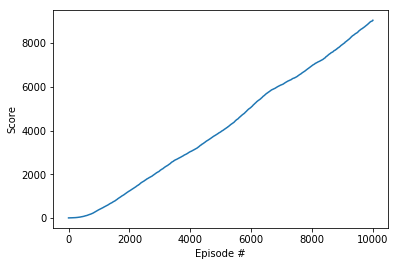

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()